In [1]:
########################################################################
#
#   Who      : Tze Goh
#   Filename : exploreHalo02_Tze
#   What     : This File is attempting to debug 2 files :
#              halo02_msto_subsample.ebf
#              halo02.dat 
#
########################################################################

In [2]:
import numpy as np
from matplotlib import pyplot as pl
import numpy.ma as ma
import matplotlib
import gxutil
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(18,18)
from astropy import units as u
from astropy.coordinates import SkyCoord

%matplotlib inline

//anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
import ebf

In [4]:
data=ebf.read('/Users/TzeGoh/Desktop/Galaxia/halo02_msto_subsample.ebf')

In [5]:
data.keys()

['rad',
 'exbv_solar',
 'teff',
 'mag2',
 'mag1',
 'mag0',
 'dcmc_h',
 'dcmc_i',
 'dcmc_j',
 'satid',
 'vx',
 'vy',
 'vz',
 'mtip',
 'log',
 'pz',
 'px',
 'py',
 'feh',
 'dcmc_ks',
 'exbv_schlegel',
 'lum',
 'exbv_schlegel_inf',
 'mact',
 'glon',
 'popid',
 'glat',
 'alpha',
 'center',
 'partid',
 'age',
 'grav',
 'smass',
 'fieldid']

In [6]:
len(data['lum'])

18208538

In [7]:
sp = ebf.read('/Users/TzeGoh/Desktop/Galaxia/satprop.ebf')

In [8]:
sp.keys()

['jsat', 'log', 'msat', 'bsat', 'nsat', 'esat', 'tsat', 'nsatc', 'lsat']

In [10]:
print(data['log'])

[ '# File generated by 0.7.1\n# <parameterfile>\noutputFile                          halo02\noutputDir                           /Users/robyn/Documents/Research/ColumbiaUndergrads/Galaxia/\nphotoSys                            DCMC\nmagcolorNames                       Ks,J-Ks\nappMagLimits[0]                     -1000\nappMagLimits[1]                     24.5\nabsMagLimits[0]                     -1000\nabsMagLimits[1]                     1000\ncolorLimits[0]                      0\ncolorLimits[1]                      1\ngeometryOption                      0\nstarType                            0\nphotoError                          0\nsurveyArea                          207.455\nfSample                             0.01\npopID                               10\nwarpFlareOn                         0\nlongitude                           76.273\nlatitude                            13.4725\nseed                                17\nr_max                               1000\n# codeDataDir        

In [12]:
#gxutil.abs2app(data,corr=True,noext=True,dered=True)

In [13]:
gxutil.append_pm(data)

In [14]:
mwd = np.zeros_like(data['grav'],dtype=bool)
mwd[data['grav']<2]=True

In [15]:
d = np.sqrt(data['px']**2+data['py']**2+data['pz']**2)

In [16]:
'''Let us match the satellite...This indexes from 0 - 112'''
those_satid_numbs = []
for i in range(len(data['satid'])):
    if data['satid'][i] not in those_satid_numbs:
        those_satid_numbs.append(data['satid'][i])
        

In [17]:
'''What are those satids for the ebf file'''
print those_satid_numbs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112]


In [18]:
########################################################################
#
#   Getting the Masses of Galaxies the EBF File
#
########################################################################

In [157]:
'''Let us match up satellite number to the total mass of each satellite'''

dict_of_satid_n_ave_mass = []
all_mass = 0
k=0
print len(data['satid'])


for i in range(len(those_satid_numbs)):
    ######print i
    for j in range(k, len(data['satid'])):
        if data['satid'][j] == i:
            all_mass = all_mass + data['smass'][j]
        else :
            k = j
            break   
    #print all_mass
    #print k
    dict_of_satid_n_ave_mass.append([i+1, all_mass])
    all_mass = 0

print dict_of_satid_n_ave_mass   

           

18208538
[[1, 166.45011705160141], [2, 40.98031097650528], [3, 128741.33903360367], [4, 780.11876583099365], [5, 2328.3470200896263], [6, 462.15064054727554], [7, 191.88900691270828], [8, 1651.4066788256168], [9, 347.67388153076172], [10, 1564.8957225084305], [11, 121.29094010591507], [12, 10722.230156898499], [13, 379.04883201420307], [14, 1131.5401731207967], [15, 1853.1995655298233], [16, 119042.78521557152], [17, 32313.848456531763], [18, 1708.7295033335686], [19, 279.55808174610138], [20, 11687.011292979121], [21, 14787.836566209793], [22, 1569.0066987276077], [23, 1503.5730587467551], [24, 23550.185319915414], [25, 117700.29448059946], [26, 678907.27631255239], [27, 12300.133594200015], [28, 2147.3823078498244], [29, 101439.26959744841], [30, 341.53143441677094], [31, 351.52672974765301], [32, 3522.1334606036544], [33, 5465.198134355247], [34, 10565.102095350623], [35, 296136.04694732279], [36, 707040.08153694868], [37, 260615.53988633305], [38, 12795.045367449522], [39, 183714.5

In [156]:
'''Tell me the satid of the 10 lowest mass and 10 higest mass satellite -- EBF'''

lowest_mass = []
lowest_id = []
list_of_mass = []
for i in range(len(those_satid_numbs)):
    list_of_mass.append(dict_of_satid_n_ave_mass[i][1] )
#print list_of_mass
for i in range(10):
    low = min(list_of_mass)
    lowest_mass.append(low)
    list_of_mass.remove(low)
    
#print lowest_mass
for i in range(len(dict_of_satid_n_ave_mass)):
    for j in range(len(lowest_mass)):
        if lowest_mass[j] == dict_of_satid_n_ave_mass[i][1]:
            lowest_id.append(dict_of_satid_n_ave_mass[i][0])

highest_mass = []
highest_id = []
list_of_mass = []
for i in range(len(those_satid_numbs)):
    list_of_mass.append(dict_of_satid_n_ave_mass[i][1] )
#print list_of_mass
for i in range(10):
    high = max(list_of_mass)
    highest_mass.append(high)
    list_of_mass.remove(high)
    
#print lowest_mass
for i in range(len(dict_of_satid_n_ave_mass)):
    for j in range(len(highest_mass)):
        if highest_mass[j] == dict_of_satid_n_ave_mass[i][1]:
            highest_id.append(dict_of_satid_n_ave_mass[i][0])
            
            
print 'These are the lowest mass satellite:', lowest_id

print 'These are the highest mass satellite:', highest_id
  
    

 These are the lowest mass satellite: [1, 2, 11, 95, 106, 107, 109, 111, 112, 113]
These are the highest mass satellite: [26, 35, 36, 37, 40, 41, 50, 55, 67, 81]


In [227]:
'''Attempting to generate a code to automize this guessing process'''
k=0
l=0
dict_of_ranges_EBF = []
for i in range(len(data['satid'])):
    if data['satid'][i]!=k:
        dict_of_ranges_EBF.append([k,l,i])
        l=i
        k=k+1
    
dict_of_ranges_EBF.append([112,l,len(data['satid'])-1])
    
print 'The dictionary is : satid,start,finish:',dict_of_ranges_EBF
    

The dictionary is : satid,start,finish: [[0, 0, 183], [1, 183, 231], [2, 231, 101656], [3, 101656, 102747], [4, 102747, 105193], [5, 105193, 105794], [6, 105794, 106007], [7, 106007, 108926], [8, 108926, 109378], [9, 109378, 112148], [10, 112148, 112294], [11, 112294, 127545], [12, 127545, 128044], [13, 128044, 130282], [14, 130282, 132458], [15, 132458, 294583], [16, 294583, 340723], [17, 340723, 345035], [18, 345035, 345382], [19, 345382, 365838], [20, 365838, 388405], [21, 388405, 391846], [22, 391846, 395085], [23, 395085, 438474], [24, 438474, 688384], [25, 688384, 2291114], [26, 2291114, 2314421], [27, 2314421, 2320638], [28, 2320638, 2525614], [29, 2525614, 2526068], [30, 2526068, 2526582], [31, 2526582, 2532352], [32, 2532352, 2542974], [33, 2542974, 2565081], [34, 2565081, 3239608], [35, 3239608, 5169454], [36, 5169454, 5766727], [37, 5766727, 5796711], [38, 5796711, 6245515], [39, 6245515, 6763899], [40, 6763899, 10248285], [41, 10248285, 10719230], [42, 10719230, 10753983], 

In [22]:
########################################################################
#
#   Getting the position of Satellite Numbers from the EBF File
#
########################################################################

In [428]:
'''I am going to try to automate getting info of all the satellites'''


def EBF_satellite_pos_and_mass(p,q,r,obj_in_satellite,first_obj_pos_for_sat,sat_ebf_px,sat_ebf_py,sat_ebf_pz,sat_ebf_mass):
 

    start = q     
    end = r

    for i in range(start,end+1):
        sat_ebf_px.append(data['px'][i])
        sat_ebf_py.append(data['py'][i])
        sat_ebf_pz.append(data['pz'][i])
        sat_ebf_mass.append(data['smass'][i])
   
    x_al = sat_ebf_px+data['center'][0]
    y_al = sat_ebf_py+data['center'][1]
    z_al = sat_ebf_pz+data['center'][2]
    m_al = sat_ebf_mass
    
    return p+1,x_al,y_al,z_al,m_al



In [429]:
'''All the info on the EBF satellite should be encoded here'''


all_pos_n_mass_EBF = []
obj_in_satellite = []
first_obj_pos_for_sat = 0
sat_ebf_px=[]
sat_ebf_py=[]
sat_ebf_pz=[]
sat_ebf_mass = []

a=dict_of_ranges_EBF
all_pos_n_mass_EBF.append([0,0,0,0,0])
for i in range(len(a)):
    [p,q,r] = [a[i][0],a[i][1],a[i][2]]

    info = EBF_satellite_pos_and_mass(p,q,r,obj_in_satellite,first_obj_pos_for_sat,sat_ebf_px,sat_ebf_py,sat_ebf_pz,sat_ebf_mass)
    all_pos_n_mass_EBF.append(info)
    
    obj_in_satellite = []
    first_obj_pos_for_sat = 0
    sat_ebf_px=[]
    sat_ebf_py=[]
    sat_ebf_pz=[]
    sat_ebf_mass = []

info_EBF = all_pos_n_mass_EBF    
for i in range(1,len(info_EBF)):
    print info_EBF[i][0], len(info_EBF[i][1])

1 184
2 49
3 101426
4 1092
5 2447
6 602
7 214
8 2920
9 453
10 2771
11 147
12 15252
13 500
14 2239
15 2177
16 162126
17 46141
18 4313
19 348
20 20457
21 22568
22 3442
23 3240
24 43390
25 249911
26 1602731
27 23308
28 6218
29 204977
30 455
31 515
32 5771
33 10623
34 22108
35 674528
36 1929847
37 597274
38 29985
39 448805
40 518385
41 3484387
42 470946
43 34754
44 4233
45 35378
46 10389
47 1735
48 31040
49 33380
50 1282038
51 61302
52 4969
53 1802
54 15422
55 1309496
56 46489
57 31089
58 264510
59 9923
60 1845
61 11332
62 202192
63 7174
64 24133
65 33002
66 12552
67 745927
68 585452
69 20743
70 3376
71 5622
72 7529
73 2275
74 10937
75 419238
76 462369
77 5832
78 727759
79 3383
80 8207
81 765534
82 1502
83 2773
84 1912
85 5502
86 1794
87 3520
88 2293
89 2847
90 139309
91 1472
92 820
93 2038
94 931
95 250
96 1092
97 1071
98 956
99 832
100 699
101 1464
102 998
103 1146
104 1692
105 44487
106 676
107 276
108 20351
109 641
110 671
111 471
112 392
113 138


In [250]:
'''I am going to get satellite 16 '''

obj_in_satellite_16 = []
first_obj_pos_for_sat_16 = []
sat_16_ebf_px=[]
sat_16_ebf_py=[]
sat_16_ebf_pz=[]
sat_16_ebf_mass = []

for i in range(130000,300000):
    if data['satid'][i]==15:
        obj_in_satellite_16.append(data['satid'][i])
        if first_obj_pos_for_sat_16 == [] :
            first_obj_pos_for_sat_16.append(i)

start = first_obj_pos_for_sat_16[0]     
end = first_obj_pos_for_sat_16[0] + len(obj_in_satellite_16)
print start, end


for i in range(start,end):
    sat_16_ebf_px.append(data['px'][i])
    sat_16_ebf_py.append(data['py'][i])
    sat_16_ebf_pz.append(data['pz'][i])
    sat_16_ebf_mass.append(data['smass'][i])
   
x_al_16 = sat_16_ebf_px+data['center'][0]
y_al_16 = sat_16_ebf_py+data['center'][1]
z_al_16 = sat_16_ebf_pz+data['center'][2]
m_al_16 = sat_16_ebf_mass

print len(x_al_16)


132458 294583
162125


In [122]:
'''I am going to get satellite 20 '''

obj_in_satellite_20 = []
first_obj_pos_for_sat_20 = []
sat_20_ebf_px=[]
sat_20_ebf_py=[]
sat_20_ebf_pz=[]
sat_20_ebf_mass = []

for i in range(300000,400000):
    if data['satid'][i]==19:
        obj_in_satellite_20.append(data['satid'][i])
        if first_obj_pos_for_sat_20 == [] :
            first_obj_pos_for_sat_20.append(i)

start = first_obj_pos_for_sat_20[0]     
end = first_obj_pos_for_sat_20[0] + len(obj_in_satellite_20)
print start, end


for i in range(start,end):
    sat_20_ebf_px.append(data['px'][i])
    sat_20_ebf_py.append(data['py'][i])
    sat_20_ebf_pz.append(data['pz'][i])
    sat_20_ebf_mass.append(data['smass'][i])
   
x_al_20 = sat_20_ebf_px+data['center'][0]
y_al_20 = sat_20_ebf_py+data['center'][1]
z_al_20 = sat_20_ebf_pz+data['center'][2]
m_al_20 = sat_20_ebf_mass

print len(x_al_20)

345382 365838
20456


In [123]:
'''I am going to get satellite 21 '''

obj_in_satellite_21 = []
first_obj_pos_for_sat_21 = []
sat_21_ebf_px=[]
sat_21_ebf_py=[]
sat_21_ebf_pz=[]
sat_21_ebf_mass = []

for i in range(300000,400000):
    if data['satid'][i]==20:
        obj_in_satellite_21.append(data['satid'][i])
        if first_obj_pos_for_sat_21 == [] :
            first_obj_pos_for_sat_21.append(i)

start = first_obj_pos_for_sat_21[0]     
end = first_obj_pos_for_sat_21[0] + len(obj_in_satellite_21)
print start, end


for i in range(start,end):
    sat_21_ebf_px.append(data['px'][i])
    sat_21_ebf_py.append(data['py'][i])
    sat_21_ebf_pz.append(data['pz'][i])
    sat_21_ebf_mass.append(data['smass'][i])
   
x_al_21 = sat_21_ebf_px+data['center'][0]
y_al_21 = sat_21_ebf_py+data['center'][1]
z_al_21 = sat_21_ebf_pz+data['center'][2]
m_al_21 = sat_21_ebf_mass

print len(x_al_21)

365838 388405
22567


In [26]:
'''I am going to get satellite 26'''

obj_in_satellite_26 = []
first_obj_pos_for_sat_26 = []
sat_26_ebf_px=[]
sat_26_ebf_py=[]
sat_26_ebf_pz=[]

for i in range(500000,2500000):
    if data['satid'][i]==25:
        obj_in_satellite_26.append(data['satid'][i])
        if first_obj_pos_for_sat_26 == [] :
            first_obj_pos_for_sat_26.append(i)

start = first_obj_pos_for_sat_26[0]     
end = first_obj_pos_for_sat_26[0] + len(obj_in_satellite_26)
print start, end

for i in range(start,end):
    sat_26_ebf_px.append(data['px'][i])
    sat_26_ebf_py.append(data['py'][i])
    sat_26_ebf_pz.append(data['pz'][i])
   
x_al_26 = sat_26_ebf_px+data['center'][0]
y_al_26 = sat_26_ebf_py+data['center'][1]
z_al_26 = sat_26_ebf_pz+data['center'][2]

print len(x_al_26)


688384 2291114
1602730


In [27]:
'''I am going to get satellite 35'''

obj_in_satellite_35 = []
first_obj_pos_for_sat_35 = []
sat_35_ebf_px=[]
sat_35_ebf_py=[]
sat_35_ebf_pz=[]

for i in range(2500000,3300000):
    if data['satid'][i]==34:
        obj_in_satellite_35.append(data['satid'][i])
        if first_obj_pos_for_sat_35 == [] :
            first_obj_pos_for_sat_35.append(i)

start = first_obj_pos_for_sat_35[0]     
end = first_obj_pos_for_sat_35[0] + len(obj_in_satellite_35)
print start, end

for i in range(start,end):
    sat_35_ebf_px.append(data['px'][i])
    sat_35_ebf_py.append(data['py'][i])
    sat_35_ebf_pz.append(data['pz'][i])
   
x_al_35 = sat_35_ebf_px+data['center'][0]
y_al_35 = sat_35_ebf_py+data['center'][1]
z_al_35 = sat_35_ebf_pz+data['center'][2]

print len(x_al_35)


2565081 3239608
674527


In [28]:
'''I am going to get satellite 36'''

obj_in_satellite_36 = []
first_obj_pos_for_sat_36 = []
sat_36_ebf_px=[]
sat_36_ebf_py=[]
sat_36_ebf_pz=[]

for i in range(3200000,5200000):
    if data['satid'][i]==35:
        obj_in_satellite_36.append(data['satid'][i])
        if first_obj_pos_for_sat_36 == [] :
            first_obj_pos_for_sat_36.append(i)

start = first_obj_pos_for_sat_36[0]     
end = first_obj_pos_for_sat_36[0] + len(obj_in_satellite_36)
print start, end

for i in range(start,end):
    sat_36_ebf_px.append(data['px'][i])
    sat_36_ebf_py.append(data['py'][i])
    sat_36_ebf_pz.append(data['pz'][i])
   
x_al_36 = sat_36_ebf_px+data['center'][0]
y_al_36 = sat_36_ebf_py+data['center'][1]
z_al_36 = sat_36_ebf_pz+data['center'][2]

print len(x_al_36)


3239608 5169454
1929846


In [29]:
'''I am going to get satellite 41'''

obj_in_satellite_41 = []
first_obj_pos_for_sat_41 = []
sat_41_ebf_px=[]
sat_41_ebf_py=[]
sat_41_ebf_pz=[]

for i in range(6000000,11000000):
    if data['satid'][i]==40:
        obj_in_satellite_41.append(data['satid'][i])
        if first_obj_pos_for_sat_41 == [] :
            first_obj_pos_for_sat_41.append(i)

start = first_obj_pos_for_sat_41[0]     
end = first_obj_pos_for_sat_41[0] + len(obj_in_satellite_41)
print start, end

for i in range(start,end):
    sat_41_ebf_px.append(data['px'][i])
    sat_41_ebf_py.append(data['py'][i])
    sat_41_ebf_pz.append(data['pz'][i])
   
x_al_41 = sat_41_ebf_px+data['center'][0]
y_al_41 = sat_41_ebf_py+data['center'][1]
z_al_41 = sat_41_ebf_pz+data['center'][2]

print len(x_al_41)

6763899 10248285
3484386


In [30]:
'''I am going to get satellite 55'''

obj_in_satellite_55 = []
first_obj_pos_for_sat_55 = []
sat_55_ebf_px=[]
sat_55_ebf_py=[]
sat_55_ebf_pz=[]

for i in range(10000000,13000000):
    if data['satid'][i]==40:
        obj_in_satellite_55.append(data['satid'][i])
        if first_obj_pos_for_sat_55 == [] :
            first_obj_pos_for_sat_55.append(i)

start = first_obj_pos_for_sat_55[0]     
end = first_obj_pos_for_sat_55[0] + len(obj_in_satellite_55)
print start, end

for i in range(start,end):
    sat_55_ebf_px.append(data['px'][i])
    sat_55_ebf_py.append(data['py'][i])
    sat_55_ebf_pz.append(data['pz'][i])
   
x_al_55 = sat_55_ebf_px+data['center'][0]
y_al_55 = sat_55_ebf_py+data['center'][1]
z_al_55 = sat_55_ebf_pz+data['center'][2]

print len(x_al_55)

10000000 10248285
248285


In [31]:
'''I am going to get satellite 81'''

obj_in_satellite_81 = []
first_obj_pos_for_sat_81 = []
sat_81_ebf_px=[]
sat_81_ebf_py=[]
sat_81_ebf_pz=[]

for i in range(17000000,18000000):
    if data['satid'][i]==80:
        obj_in_satellite_81.append(data['satid'][i])
        if first_obj_pos_for_sat_81 == [] :
            first_obj_pos_for_sat_81.append(i)

start = first_obj_pos_for_sat_81[0]     
end = first_obj_pos_for_sat_81[0] + len(obj_in_satellite_81)
print start, end

for i in range(start,end):
    sat_81_ebf_px.append(data['px'][i])
    sat_81_ebf_py.append(data['py'][i])
    sat_81_ebf_pz.append(data['pz'][i])
   
x_al_81 = sat_81_ebf_px+data['center'][0]
y_al_81 = sat_81_ebf_py+data['center'][1]
z_al_81 = sat_81_ebf_pz+data['center'][2]

print len(x_al_81)

17198020 17963553
765533


In [32]:
'''I am going to get low_mass satellite 1'''

obj_in_satellite_1 = []
first_obj_pos_for_sat_1 = []
sat_1_ebf_px=[]
sat_1_ebf_py=[]
sat_1_ebf_pz=[]

for i in range(0,1000):
    if data['satid'][i]==0:
        obj_in_satellite_1.append(data['satid'][i])
        if first_obj_pos_for_sat_1 == [] :
            first_obj_pos_for_sat_1.append(i)

start = first_obj_pos_for_sat_1[0]     
end = first_obj_pos_for_sat_1[0] + len(obj_in_satellite_1)
print start, end

for i in range(start,end):
    sat_1_ebf_px.append(data['px'][i])
    sat_1_ebf_py.append(data['py'][i])
    sat_1_ebf_pz.append(data['pz'][i])
   
x_al_1 = sat_1_ebf_px+data['center'][0]
y_al_1 = sat_1_ebf_py+data['center'][1]
z_al_1 = sat_1_ebf_pz+data['center'][2]

print len(x_al_1)

0 183
183


In [33]:
'''I am going to get low_mass satellite 2'''

obj_in_satellite_2 = []
first_obj_pos_for_sat_2 = []
sat_2_ebf_px=[]
sat_2_ebf_py=[]
sat_2_ebf_pz=[]

for i in range(0,1000):
    if data['satid'][i]==1:
        obj_in_satellite_2.append(data['satid'][i])
        if first_obj_pos_for_sat_2 == [] :
            first_obj_pos_for_sat_2.append(i)

start = first_obj_pos_for_sat_2[0]     
end = first_obj_pos_for_sat_2[0] + len(obj_in_satellite_2)
print start, end

for i in range(start,end):
    sat_2_ebf_px.append(data['px'][i])
    sat_2_ebf_py.append(data['py'][i])
    sat_2_ebf_pz.append(data['pz'][i])
   
x_al_2 = sat_2_ebf_px+data['center'][0]
y_al_2 = sat_2_ebf_py+data['center'][1]
z_al_2 = sat_2_ebf_pz+data['center'][2]

print len(x_al_2)

183 231
48


In [34]:
'''I am going to get low_mass satellite 11'''

obj_in_satellite_11 = []
first_obj_pos_for_sat_11 = []
sat_11_ebf_px=[]
sat_11_ebf_py=[]
sat_11_ebf_pz=[]

for i in range(100000,200000):
    if data['satid'][i]==10:
        obj_in_satellite_11.append(data['satid'][i])
        if first_obj_pos_for_sat_11 == [] :
            first_obj_pos_for_sat_11.append(i)

start = first_obj_pos_for_sat_11[0]     
end = first_obj_pos_for_sat_11[0] + len(obj_in_satellite_11)
print start, end

for i in range(start,end):
    sat_11_ebf_px.append(data['px'][i])
    sat_11_ebf_py.append(data['py'][i])
    sat_11_ebf_pz.append(data['pz'][i])
   
x_al_11 = sat_11_ebf_px+data['center'][0]
y_al_11 = sat_11_ebf_py+data['center'][1]
z_al_11 = sat_11_ebf_pz+data['center'][2]

print len(x_al_11)

112148 112294
146


In [35]:
'''I am going to get low_mass satellite 95'''

obj_in_satellite_95 = []
first_obj_pos_for_sat_95 = []
sat_95_ebf_px=[]
sat_95_ebf_py=[]
sat_95_ebf_pz=[]
sat_95_ebf_mass = []

for i in range(18000000,18208538):
    if data['satid'][i]==94:
        obj_in_satellite_95.append(data['satid'][i])
        if first_obj_pos_for_sat_95 == [] :
            first_obj_pos_for_sat_95.append(i)

start = first_obj_pos_for_sat_95[0]     
end = first_obj_pos_for_sat_95[0] + len(obj_in_satellite_95)
print start, end

for i in range(start,end):
    sat_95_ebf_px.append(data['px'][i])
    sat_95_ebf_py.append(data['py'][i])
    sat_95_ebf_pz.append(data['pz'][i])
    sat_95_ebf_mass.append(data['smass'][i])
   
x_al_95 = sat_95_ebf_px+data['center'][0]
y_al_95 = sat_95_ebf_py+data['center'][1]
z_al_95 = sat_95_ebf_pz+data['center'][2]
m_al_95 = sat_95_ebf_mass

print len(x_al_95)

18130253 18130502
249


In [36]:
'''I am going to get low_mass satellite 106'''

obj_in_satellite_106 = []
first_obj_pos_for_sat_106 = []
sat_106_ebf_px=[]
sat_106_ebf_py=[]
sat_106_ebf_pz=[]
sat_106_ebf_mass = []

for i in range(18000000,18208538):
    if data['satid'][i]==105:
        obj_in_satellite_106.append(data['satid'][i])
        if first_obj_pos_for_sat_106 == [] :
            first_obj_pos_for_sat_106.append(i)

start = first_obj_pos_for_sat_106[0]     
end = first_obj_pos_for_sat_106[0] + len(obj_in_satellite_106)
print start, end

for i in range(start,end):
    sat_106_ebf_px.append(data['px'][i])
    sat_106_ebf_py.append(data['py'][i])
    sat_106_ebf_pz.append(data['pz'][i])
    sat_106_ebf_mass.append(data['smass'][i])
   
x_al_106 = sat_106_ebf_px+data['center'][0]
y_al_106 = sat_106_ebf_py+data['center'][1]
z_al_106 = sat_106_ebf_pz+data['center'][2]
m_al_106 = sat_106_ebf_mass

print len(x_al_106)

18184929 18185604
675


In [37]:
'''I am going to get low_mass satellite 107'''

obj_in_satellite_107 = []
first_obj_pos_for_sat_107 = []
sat_107_ebf_px=[]
sat_107_ebf_py=[]
sat_107_ebf_pz=[]
sat_107_ebf_mass = []

for i in range(18000000,18208538):
    if data['satid'][i]==106:
        obj_in_satellite_107.append(data['satid'][i])
        if first_obj_pos_for_sat_107 == [] :
            first_obj_pos_for_sat_107.append(i)

start = first_obj_pos_for_sat_107[0]     
end = first_obj_pos_for_sat_107[0] + len(obj_in_satellite_107)
print start, end

for i in range(start,end):
    sat_107_ebf_px.append(data['px'][i])
    sat_107_ebf_py.append(data['py'][i])
    sat_107_ebf_pz.append(data['pz'][i])
    sat_107_ebf_mass.append(data['smass'][i])
   
x_al_107 = sat_107_ebf_px+data['center'][0]
y_al_107 = sat_107_ebf_py+data['center'][1]
z_al_107 = sat_107_ebf_pz+data['center'][2]
m_al_107 = sat_107_ebf_mass

print len(x_al_107)

18185604 18185879
275


In [243]:
'''I am going to get low_mass satellite 109'''

obj_in_satellite_109 = []
first_obj_pos_for_sat_109 = []
sat_109_ebf_px=[]
sat_109_ebf_py=[]
sat_109_ebf_pz=[]
sat_109_ebf_mass = []

for i in range(18000000,18208538):
    if data['satid'][i]==108:
        obj_in_satellite_109.append(data['satid'][i])
        if first_obj_pos_for_sat_109 == [] :
            first_obj_pos_for_sat_109.append(i)

start = first_obj_pos_for_sat_109[0]     
end = first_obj_pos_for_sat_109[0] + len(obj_in_satellite_109)
print start, end

for i in range(start,end):
    sat_109_ebf_px.append(data['px'][i])
    sat_109_ebf_py.append(data['py'][i])
    sat_109_ebf_pz.append(data['pz'][i])
    sat_109_ebf_mass.append(data['smass'][i])
   
x_al_109 = sat_109_ebf_px+data['center'][0]
y_al_109 = sat_109_ebf_py+data['center'][1]
z_al_109 = sat_109_ebf_pz+data['center'][2]
m_al_109 = sat_109_ebf_mass

print len(x_al_109)

18206229 18206869
640


In [245]:
'''I am going to get low_mass satellite 109'''

obj_in_satellite_111 = []
first_obj_pos_for_sat_111 = []
sat_111_ebf_px=[]
sat_111_ebf_py=[]
sat_111_ebf_pz=[]
sat_111_ebf_mass = []

for i in range(18000000,18208538):
    if data['satid'][i]==110:
        obj_in_satellite_111.append(data['satid'][i])
        if first_obj_pos_for_sat_111 == [] :
            first_obj_pos_for_sat_111.append(i)

start = first_obj_pos_for_sat_111[0]     
end = first_obj_pos_for_sat_111[0] + len(obj_in_satellite_111)
print start, end

for i in range(start,end):
    sat_111_ebf_px.append(data['px'][i])
    sat_111_ebf_py.append(data['py'][i])
    sat_111_ebf_pz.append(data['pz'][i])
    sat_111_ebf_mass.append(data['smass'][i])
   
x_al_111 = sat_111_ebf_px+data['center'][0]
y_al_111 = sat_111_ebf_py+data['center'][1]
z_al_111 = sat_111_ebf_pz+data['center'][2]
m_al_111 = sat_111_ebf_mass

print len(x_al_111)

18207539 18208009
470


In [247]:
'''I am going to get low_mass satellite 112'''

obj_in_satellite_112 = []
first_obj_pos_for_sat_112 = []
sat_112_ebf_px=[]
sat_112_ebf_py=[]
sat_112_ebf_pz=[]
sat_112_ebf_mass = []

for i in range(18000000,18208538):
    if data['satid'][i]==111:
        obj_in_satellite_112.append(data['satid'][i])
        if first_obj_pos_for_sat_112 == [] :
            first_obj_pos_for_sat_112.append(i)

start = first_obj_pos_for_sat_112[0]     
end = first_obj_pos_for_sat_112[0] + len(obj_in_satellite_112)
print start, end

for i in range(start,end):
    sat_112_ebf_px.append(data['px'][i])
    sat_112_ebf_py.append(data['py'][i])
    sat_112_ebf_pz.append(data['pz'][i])
    sat_112_ebf_mass.append(data['smass'][i])
   
x_al_112 = sat_112_ebf_px+data['center'][0]
y_al_112 = sat_112_ebf_py+data['center'][1]
z_al_112 = sat_112_ebf_pz+data['center'][2]
m_al_112 = sat_112_ebf_mass

print len(x_al_112)

18208009 18208400
391


In [248]:
'''I am going to get low_mass satellite 113'''

obj_in_satellite_113 = []
first_obj_pos_for_sat_113 = []
sat_113_ebf_px=[]
sat_113_ebf_py=[]
sat_113_ebf_pz=[]
sat_113_ebf_mass = []

for i in range(18000000,18208538):
    if data['satid'][i]==112:
        obj_in_satellite_113.append(data['satid'][i])
        if first_obj_pos_for_sat_113 == [] :
            first_obj_pos_for_sat_113.append(i)

start = first_obj_pos_for_sat_113[0]     
end = first_obj_pos_for_sat_113[0] + len(obj_in_satellite_113)
print start, end

for i in range(start,end):
    sat_113_ebf_px.append(data['px'][i])
    sat_113_ebf_py.append(data['py'][i])
    sat_113_ebf_pz.append(data['pz'][i])
    sat_113_ebf_mass.append(data['smass'][i])
   
x_al_113 = sat_113_ebf_px+data['center'][0]
y_al_113 = sat_113_ebf_py+data['center'][1]
z_al_113 = sat_113_ebf_pz+data['center'][2]
m_al_113 = sat_112_ebf_mass

print len(x_al_113)

18208400 18208538
138


In [42]:
########################################################################
#
#   Getting the Satellite Numbers from the DAT File
#
########################################################################

In [43]:
'''Opening the DAT File'''
f = open('halo02.dat')
hel = []
for line in f:
    hel.append(line)
    

In [44]:
'''Appending the DAT File into a list ... this list indexes from 0 to 112'''
length = len(hel)
print length

flow = []
for i in range(length):
    floats = [float(x) for x in hel[i].split()]
    flow.append(floats)    

those_satid_numbs_for_DAT_file = []
for i in range(length):
    if flow[i][0] not in those_satid_numbs_for_DAT_file:
        those_satid_numbs_for_DAT_file.append(flow[i][0])

2391434


In [45]:
'''Tell me what those satid file is for the DAT file'''
print those_satid_numbs_for_DAT_file

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0]


In [207]:
'''The DAT File in x and y'''
print flow[0]
print flow[1]
print flow[2]
print flow[1232]

x = []
y = []
z = []
for i in range(length):
    x.append(flow[i][1])
    y.append(flow[i][2])
    z.append(flow[i][3])
print x[0]

[1.0, -81.92, 154.85, -89.646, 27.789, -12.216, 55.966, 0.0, -2325.7, -41756.0, 12.633, -1.871, 0.2815, 46.227]
[1.0, -82.313, 155.28, -89.58, 42.948, 8.3972, 68.347, 0.0, -2110.6, -41692.0, 11.426, -1.6458, 0.062174, 8.6309]
[1.0, -82.281, 155.18, -89.049, 33.886, 9.4412, 65.918, 0.0, -2046.6, -41737.0, 12.646, -1.875, 0.2855, 6.1403]
[1.0, -82.093, 154.64, -89.427, 35.239, 14.649, 39.768, 0.0, -2298.7, -41783.0, 2.6889, -1.2237, -0.32652, 20.558]
-81.92


In [211]:
'''Let us match up satellite number to the total mass of each satellite'''

dict_of_satid_n_mass_DAT = []
temp_mass = 0
k=0

for j in range(1,114):
    #print j
    for i in range(k,len(flow)):
        if flow[i][0] == j:
            temp_mass = temp_mass + flow[i][13]
            k=k+1
        else:
            break
    dict_of_satid_n_mass_DAT.append([j,temp_mass])
    temp_mass = 0


print dict_of_satid_n_mass_DAT
      

[[1, 456824.5067999998], [2, 468376.0778000055], [3, 223397454.5999992], [4, 332380.89760000125], [5, 3375795.5470000166], [6, 361305.3823000009], [7, 761718.8180000021], [8, 415855.3709000003], [9, 320664.2871600077], [10, 399999.8691000025], [11, 284382.29429999995], [12, 5924810.680000009], [13, 269662.9023999982], [14, 356394.11869999935], [15, 2225663.851899953], [16, 54418605.29999983], [17, 11578947.12499998], [18, 325520.8454999986], [19, 345132.7917999985], [20, 4503067.687999976], [21, 7318521.247000007], [22, 433510.614600001], [23, 589788.6025999985], [24, 6328947.169000028], [25, 45599991.11999951], [26, 114999999.0999996], [27, 4329031.759999972], [28, 363742.7114000006], [29, 31237320.590000056], [30, 247668.31220000004], [31, 194570.11260000046], [32, 1718861.237999998], [33, 1342105.2119999966], [34, 2609374.870999996], [35, 60683754.33999959], [36, 128595052.60000023], [37, 47413787.700000145], [38, 2655462.495000007], [39, 39504133.58999974], [40, 54575144.44999987],

In [213]:
'''Tell me the satid of the 10 lowest mass and 10 higest mass satellite -- DAT'''

lowest_mass = []
lowest_id_DAT = []
list_of_mass = []
for i in range(len(dict_of_satid_n_mass_DAT)):
    list_of_mass.append(dict_of_satid_n_mass_DAT[i][1] )
#print list_of_mass
for i in range(10):
    low = min(list_of_mass)
    lowest_mass.append(low)
    list_of_mass.remove(low)
    
#print lowest_mass
for i in range(len(dict_of_satid_n_mass_DAT)):
    for j in range(len(lowest_mass)):
        if lowest_mass[j] == dict_of_satid_n_mass_DAT[i][1]:
            lowest_id_DAT.append(dict_of_satid_n_mass_DAT[i][0])

highest_mass = []
highest_id_DAT = []
list_of_mass = []
for i in range(len(dict_of_satid_n_mass_DAT)):
    list_of_mass.append(dict_of_satid_n_mass_DAT[i][1] )
#print list_of_mass
for i in range(10):
    high = max(list_of_mass)
    highest_mass.append(high)
    list_of_mass.remove(high)
    
#print lowest_mass
for i in range(len(dict_of_satid_n_mass_DAT)):
    for j in range(len(highest_mass)):
        if highest_mass[j] == dict_of_satid_n_mass_DAT[i][1]:
            highest_id_DAT.append(dict_of_satid_n_mass_DAT[i][0])
            
            
print 'These are the lowest mass satellite:', lowest_id

print 'These are the highest mass satellite:', highest_id
  
    

These are the lowest mass satellite: [92, 95, 100, 106, 107, 109, 110, 111, 112, 113]
These are the highest mass satellite: [3, 16, 26, 35, 36, 37, 40, 41, 50, 55]


In [390]:
'''Let me automate the whole process of finding position and mass'''
all_pos_n_mass_DAT = []
sat_dat=[]
x = []
y = []
z = []
m = []

p=16

def DAT_satellite_pos_and_mass(p):
    for i in range(len(flow)):
        if flow[i][0] == p:
            sat_dat.append(flow[i])
        
    length = len(sat_dat)

    for i in range(length):
        x.append(sat_dat[i][1])
        y.append(sat_dat[i][2])
        z.append(sat_dat[i][3])
        m.append(sat_dat[i][13])
    
    return p,x,y,z,m

a=DAT_satellite_pos_and_mass(p)
print len(a[1])

all_pos_n_mass_DAT.append([0,0,0,0,0])
for j in range(1,114):
    p=j
    info = DAT_satellite_pos_and_mass(p)
    all_pos_n_mass_DAT.append(info)
    
    sat_dat=[]
    x = []
    y = []
    z = []
    m = []

info_DAT = all_pos_n_mass_DAT    
for i in range(1,len(info_DAT)):
    print info_DAT[i][0], len(info_DAT[i][1])
    

18251
1 59557
2 53936
3 28281
4 16115
5 42958
6 20103
7 10419
8 24628
9 56186
10 16115
11 47205
12 6745
13 29713
14 31459
15 42958
16 18251
17 42958
18 47205
19 35108
20 21544
21 17447
22 23055
23 12512
24 29713
25 35108
26 16357
27 6745
28 20103
29 29713
30 5149
31 12512
32 11398
33 20103
34 9394
35 18778
36 13657
37 21544
38 14865
39 31459
40 14865
41 10419
42 14377
43 5946
44 6745
45 9394
46 31459
47 27984
48 21544
49 18778
50 13190
51 12512
52 16115
53 13657
54 14865
55 11398
56 31459
57 5946
58 10026
59 11398
60 31459
61 10419
62 16115
63 35108
64 31459
65 13657
66 17447
67 8611
68 8440
69 6745
70 27984
71 47205
72 26227
73 11398
74 8440
75 16115
76 6399
77 5149
78 5149
79 23055
80 12512
81 11398
82 4438
83 58475
84 17447
85 6745
86 35108
87 23055
88 27984
89 4438
90 5149
91 5946
92 4438
93 47205
94 26227
95 18778
96 53936
97 9394
98 5149
99 5149
100 65873
101 42958
102 17447
103 35108
104 8440
105 17447
106 18778
107 18778
108 8440
109 73411
110 13657
111 29713
112 21544
113 1365

In [188]:
'''Getting Satellite No. 16'''
sat_16_dat=[]
x16 = []
y16 = []
z16 = []
m16 = []

for i in range(len(flow)):
    if flow[i][0] == 16.0:
        sat_16_dat.append(flow[i])
        
length = len(sat_16_dat)

for i in range(length):
    x16.append(sat_16_dat[i][1])
    y16.append(sat_16_dat[i][2])
    z16.append(sat_16_dat[i][3])
    m16.append(sat_16_dat[i][13])
    
print len(x16)

18251


In [189]:
'''Getting Satellite No. 20'''
sat_20_dat=[]
x20 = []
y20 = []
z20 = []
m20 = []

for i in range(len(flow)):
    if flow[i][0] == 20.0:
        sat_20_dat.append(flow[i])
        
length = len(sat_20_dat)

for i in range(length):
    x20.append(sat_20_dat[i][1])
    y20.append(sat_20_dat[i][2])
    z20.append(sat_20_dat[i][3])
    m20.append(sat_20_dat[i][13])
    
print len(x20)

21544


In [190]:
'''Getting Satellite No. 21'''
sat_21_dat=[]
x21 = []
y21 = []
z21 = []
m21 = []

for i in range(len(flow)):
    if flow[i][0] == 21.0:
        sat_21_dat.append(flow[i])
        
length = len(sat_21_dat)

for i in range(length):
    x21.append(sat_21_dat[i][1])
    y21.append(sat_21_dat[i][2])
    z21.append(sat_21_dat[i][3])
    m21.append(sat_21_dat[i][13])
    
print len(x21)

17447


In [192]:
'''Getting Satellite No. 26`'''
sat_26_dat=[]
x26 = []
y26 = []
z26 = []
m26 = []

for i in range(len(flow)):
    if flow[i][0] == 26.0:
        sat_26_dat.append(flow[i])
        
length = len(sat_26_dat)

for i in range(length):
    x26.append(sat_26_dat[i][1])
    y26.append(sat_26_dat[i][2])
    z26.append(sat_26_dat[i][3])
    m26.append(sat_26_dat[i][13])
print len(x26)

16357


In [193]:
'''Getting Satellite No. 35'''
sat_35_dat=[]
x35 = []
y35 = []
z35 = []
m35 = []

for i in range(len(flow)):
    if flow[i][0] == 35.0:
        sat_35_dat.append(flow[i])
        
length = len(sat_35_dat)

for i in range(length):
    x35.append(sat_35_dat[i][1])
    y35.append(sat_35_dat[i][2])
    z35.append(sat_35_dat[i][3])
    m35.append(sat_35_dat[i][13])
    
print len(x35)

18778


In [194]:
'''Getting Satellite No. 36'''
sat_36_dat=[]
x36 = []
y36 = []
z36 = []
m36 = []
for i in range(len(flow)):
    if flow[i][0] == 36.0:
        sat_36_dat.append(flow[i])
        
length = len(sat_36_dat)

for i in range(length):
    x36.append(sat_36_dat[i][1])
    y36.append(sat_36_dat[i][2])
    z36.append(sat_36_dat[i][3])
    m36.append(sat_36_dat[i][13])
print len(x36)

13657


In [195]:
'''Getting Satellite No. 41`'''
sat_41_dat=[]
x41 = []
y41 = []
z41 = []
m41 = []

for i in range(len(flow)):
    if flow[i][0] == 41.0:
        sat_41_dat.append(flow[i])
        
length = len(sat_41_dat)

for i in range(length):
    x41.append(sat_41_dat[i][1])
    y41.append(sat_41_dat[i][2])
    z41.append(sat_41_dat[i][3])
    m41.append(sat_41_dat[i][13])
print len(x41)

10419


In [196]:
'''Getting Satellite No. 55`'''
sat_55_dat=[]
x55 = []
y55 = []
z55 = []
m55 = []

for i in range(len(flow)):
    if flow[i][0] == 55.0:
        sat_55_dat.append(flow[i])
        
length = len(sat_55_dat)

for i in range(length):
    x55.append(sat_55_dat[i][1])
    y55.append(sat_55_dat[i][2])
    z55.append(sat_55_dat[i][3])
    m55.append(sat_55_dat[i][13])
print len(x55)

11398


In [197]:
'''Getting Satellite No. 81'''
sat_81_dat=[]
x81 = []
y81 = []
z81 = []
m81 = []

for i in range(len(flow)):
    if flow[i][0] == 81.0:
        sat_81_dat.append(flow[i])
        
length = len(sat_81_dat)

for i in range(length):
    x81.append(sat_81_dat[i][1])
    y81.append(sat_81_dat[i][2])
    z81.append(sat_81_dat[i][3])
    m81.append(sat_81_dat[i][13])
print len(x81)

11398


In [201]:
'''Getting Low_Mass Satellite No. 1'''
sat_1_dat=[]
x1 = []
y1 = []
z1 = []
m1 = []

for i in range(len(flow)):
    if flow[i][0] == 1.0:
        sat_1_dat.append(flow[i])
        
length = len(sat_1_dat)

for i in range(length):
    x1.append(sat_1_dat[i][1])
    y1.append(sat_1_dat[i][2])
    z1.append(sat_1_dat[i][3])
    m1.append(sat_1_dat[i][13])
print len(x1)

23055


In [202]:
'''Getting Low_Mass Satellite No. 2'''
sat_2_dat=[]
x2 = []
y2 = []
z2 = []
m2 = []

for i in range(len(flow)):
    if flow[i][0] == 2.0:
        sat_2_dat.append(flow[i])
        
length = len(sat_2_dat)

for i in range(length):
    x2.append(sat_2_dat[i][1])
    y2.append(sat_2_dat[i][2])
    z2.append(sat_2_dat[i][3])
    m2.append(sat_2_dat[i][13])
print len(x2)

53936


In [203]:
'''Getting Low_Mass Satellite No. 11'''
sat_11_dat=[]
x11 = []
y11 = []
z11 = []
m11 = []

for i in range(len(flow)):
    if flow[i][0] == 11.0:
        sat_11_dat.append(flow[i])
        
length = len(sat_11_dat)

for i in range(length):
    x11.append(sat_11_dat[i][1])
    y11.append(sat_11_dat[i][2])
    z11.append(sat_11_dat[i][3])
    m11.append(sat_11_dat[i][13])
print len(x11)

47205


In [59]:
'''Getting Low_Mass Satellite No. 95'''
sat_95_dat=[]
x95 = []
y95 = []
z95 = []
m95 = []

for i in range(len(flow)):
    if flow[i][0] == 95.0:
        sat_95_dat.append(flow[i])
        
length = len(sat_95_dat)

for i in range(length):
    x95.append(sat_95_dat[i][1])
    y95.append(sat_95_dat[i][2])
    z95.append(sat_95_dat[i][3])
    m95.append(sat_95_dat[i][13])
print len(x95)

18778


In [60]:
'''Getting Low_Mass Satellite No. 106'''
sat_106_dat=[]
x106 = []
y106 = []
z106 = []
m106 = []

for i in range(len(flow)):
    if flow[i][0] == 106.0:
        sat_106_dat.append(flow[i])
        
length = len(sat_106_dat)

for i in range(length):
    x106.append(sat_106_dat[i][1])
    y106.append(sat_106_dat[i][2])
    z106.append(sat_106_dat[i][3])
    m106.append(sat_106_dat[i][13])
print len(x106)

18778


In [61]:
'''Getting Low_Mass Satellite No. 107'''
sat_107_dat=[]
x107 = []
y107 = []
z107 = []
m107 = []

for i in range(len(flow)):
    if flow[i][0] == 107.0:
        sat_107_dat.append(flow[i])
        
length = len(sat_107_dat)

for i in range(length):
    x107.append(sat_107_dat[i][1])
    y107.append(sat_107_dat[i][2])
    z107.append(sat_107_dat[i][3])
    m107.append(sat_107_dat[i][13])
print len(x107)

18778


In [62]:
'''Getting Low_Mass Satellite No. 109'''
sat_109_dat=[]
x109 = []
y109 = []
z109 = []
m109 = []

for i in range(len(flow)):
    if flow[i][0] == 109.0:
        sat_109_dat.append(flow[i])
        
length = len(sat_109_dat)

for i in range(length):
    x109.append(sat_109_dat[i][1])
    y109.append(sat_109_dat[i][2])
    z109.append(sat_109_dat[i][3])
    m109.append(sat_109_dat[i][13])

print len(x109)

73411


In [204]:
'''Getting Low_Mass Satellite No. 111'''
sat_111_dat=[]
x111 = []
y111 = []
z111 = []
m111 = []

for i in range(len(flow)):
    if flow[i][0] == 111.0:
        sat_111_dat.append(flow[i])
        
length = len(sat_111_dat)

for i in range(length):
    x111.append(sat_111_dat[i][1])
    y111.append(sat_111_dat[i][2])
    z111.append(sat_111_dat[i][3])
    m111.append(sat_111_dat[i][13])
print len(x111)

29713


In [205]:
'''Getting Low_Mass Satellite No. 112'''
sat_112_dat=[]
x112 = []
y112 = []
z112 = []
m112 = []

for i in range(len(flow)):
    if flow[i][0] == 112.0:
        sat_112_dat.append(flow[i])
        
length = len(sat_112_dat)

for i in range(length):
    x112.append(sat_112_dat[i][1])
    y112.append(sat_112_dat[i][2])
    z112.append(sat_112_dat[i][3])
    m112.append(sat_112_dat[i][13])
print len(x112)

21544


In [206]:
'''Getting Low_Mass Satellite No. 113'''
sat_113_dat=[]
x113 = []
y113 = []
z113 = []
m113 = []

for i in range(len(flow)):
    if flow[i][0] == 113.0:
        sat_113_dat.append(flow[i])
        
length = len(sat_113_dat)

for i in range(length):
    x113.append(sat_113_dat[i][1])
    y113.append(sat_113_dat[i][2])
    z113.append(sat_113_dat[i][3])
    m113.append(sat_113_dat[i][13])
print len(x113)

13657


In [67]:
#########################################################################################################
#
#    And now, let's plot all the galaxies out from these 2 files to make sure that they are the same 
#
#########################################################################################################

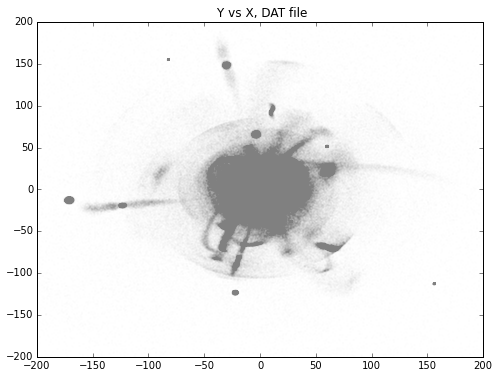

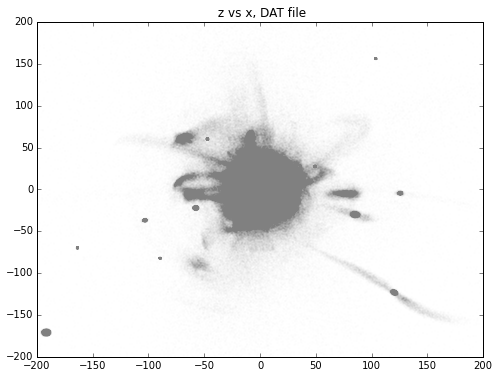

In [68]:
'''The plot for the whole DAT file in Y vs X '''
plt.rcParams['figure.figsize']=(8,6)

plt.figure(1)
pl.xlim(-200,200)
pl.ylim(-200,200)
pl.plot(x,y,'.',ms=1,alpha=0.05,color='grey')
plt.title(' Y vs X, DAT file')

plt.figure(2)
pl.xlim(-200,200)
pl.ylim(-200,200)
pl.plot(z,x,'.',ms=1,alpha=0.05,color='grey')
plt.title(' z vs x, DAT file')

In [430]:
p=16

print info_EBF[p][0]
print info_DAT[p][0]

print info_EBF[p][0], len(info_EBF[p][1]),len(x_al_16),info_EBF[p][1][100],x_al_16[100]
print info_DAT[p][0], len(info_DAT[p][1]),len(x16),info_DAT[p][1][100],x16[100]


p=21

print info_EBF[p][0]
print info_DAT[p][0]

print info_EBF[p][0], len(info_EBF[p][1]),len(x_al_21),info_EBF[p][1][100],x_al_21[100]
print info_DAT[p][0], len(info_DAT[p][1]),len(x21),info_DAT[p][1][100],x21[100]

16
16
16 162126 162125 -4.47591 -4.47591
16 18251 18251 -6.914 -6.914
21
21
21 22568 22567 62.1304 62.1304
21 17447 17447 37.215 37.215


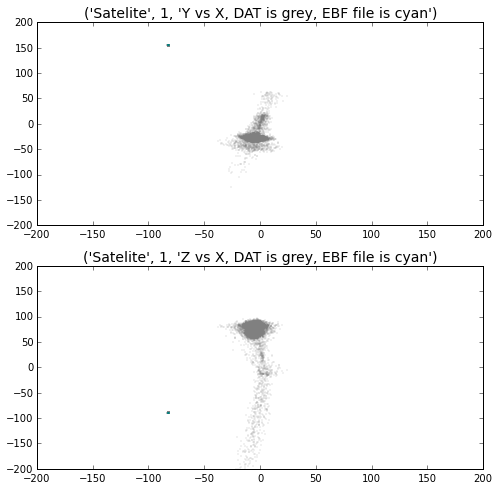

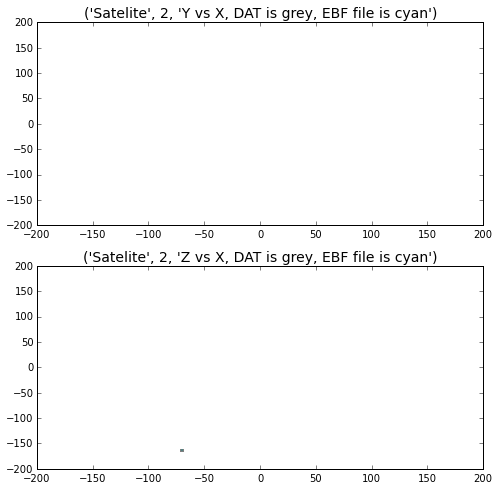

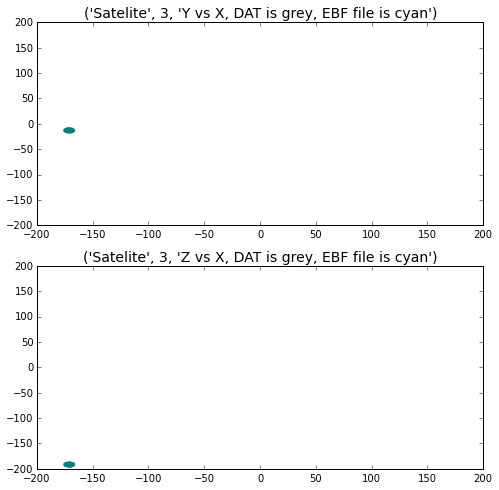

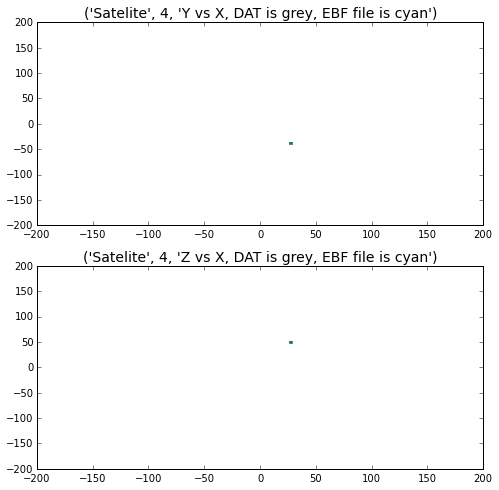

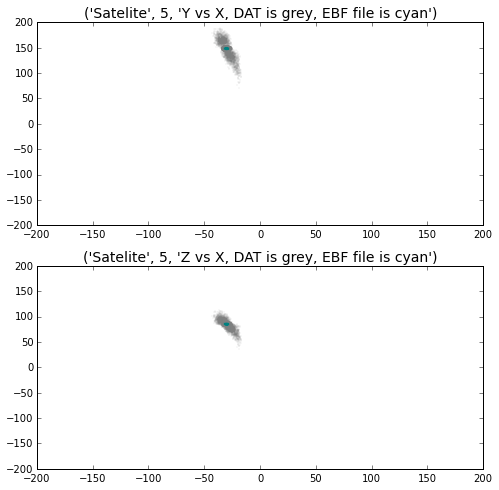

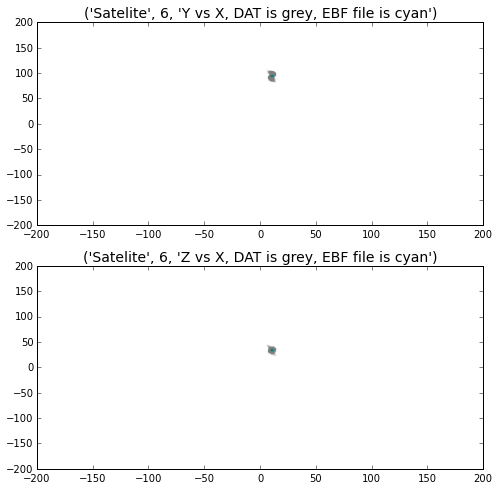

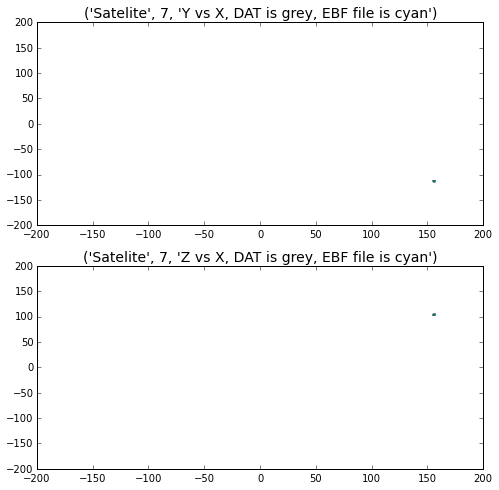

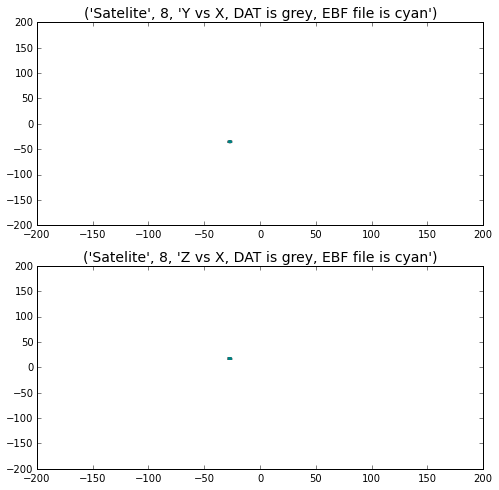

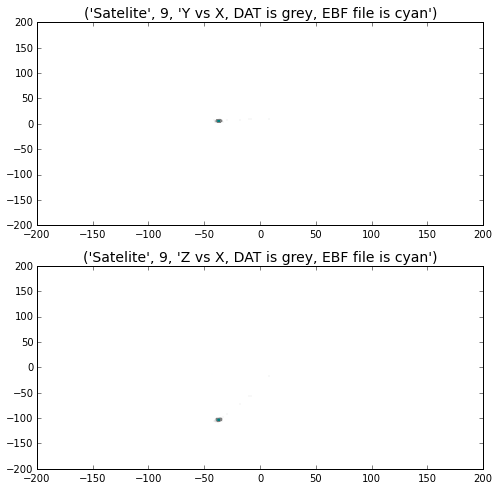

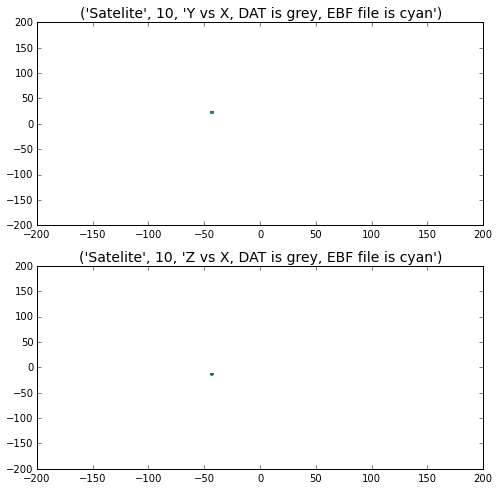

In [432]:
'''Plot me ALL Satellite 2d '''

def plot_me(p,xstart,xend,ystart,yend,zstart,zend):
 

    plt.rcParams['figure.figsize']=(8,8)


    plt.subplot(2,1,1)
    plt.plot(info_DAT[p][1],info_DAT[p][2],'.',ms=3,alpha=0.05,color='grey')
   
    plt.xlim(xstart,xend)
    plt.ylim(ystart,yend)

    plt.subplot(2,1,2)
    plt.plot(info_DAT[p][1],info_DAT[p][3],'.',ms=3,alpha=0.05,color='grey')

    plt.xlim(xstart,xend)
    plt.ylim(zstart,zend)

    plt.subplot(2,1,1)
    pl.plot(info_EBF[p][1],info_EBF[p][2],'.',ms=2,alpha=0.01,color='cyan')
    title = 'Satelite',p,'Y vs X, DAT is grey, EBF file is cyan'
    plt.title(title,fontsize=14)

    plt.subplot(2,1,2)
    plt.plot(info_EBF[p][1],info_EBF[p][3],'.',ms=2,alpha=0.01,color='cyan')
    title ='Satelite',p,'Z vs X, DAT is grey, EBF file is cyan'
    plt.title(title,fontsize=14)
 
#####################################################################
p=1
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=2
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=3
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=4
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=5
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=6
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=7
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=8
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=9
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=10
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()


18251
162125


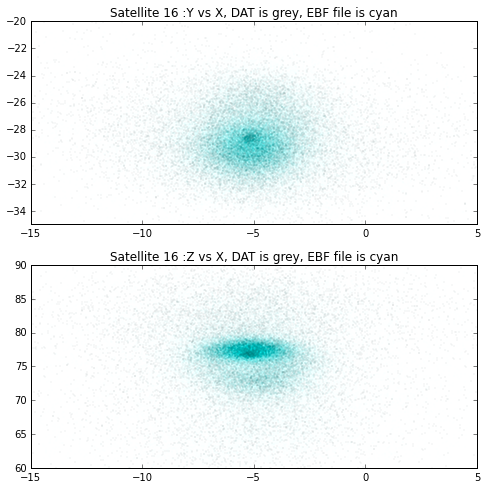

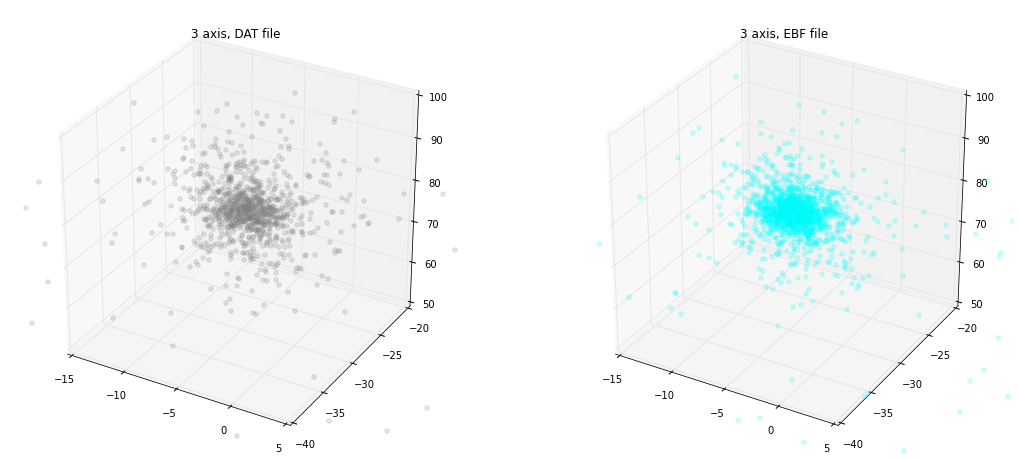

In [163]:
'''Plot me Satellite 16 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)

length = len(sat_16_dat)

print len(x16)

plt.subplot(2,1,1)
plt.plot(x16,y16,'.',ms=3,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.xlim(-15,5)
plt.ylim(-35,-20)

plt.subplot(2,1,2)
plt.plot(x16,z16,'.',ms=3,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-15,5)
plt.ylim(60,90)

plt.subplot(2,1,1)
pl.plot(x_al_16,y_al_16,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 16 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_16,z_al_16,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 16 :Z vs X, DAT is grey, EBF file is cyan')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_16_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-15,5)
ax.set_ylim(-40,-20)
ax.set_zlim(50,100)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x16[line],y16[line],z16[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-15,5)
ax.set_ylim(-40,-20)
ax.set_zlim(50,100)

print len(x_al_16)

for i in range(len(x_al_16)):
    if i % 100 == 0:
        ax.scatter(x_al_16[i],y_al_16[i],z_al_16[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')   

21544
20456


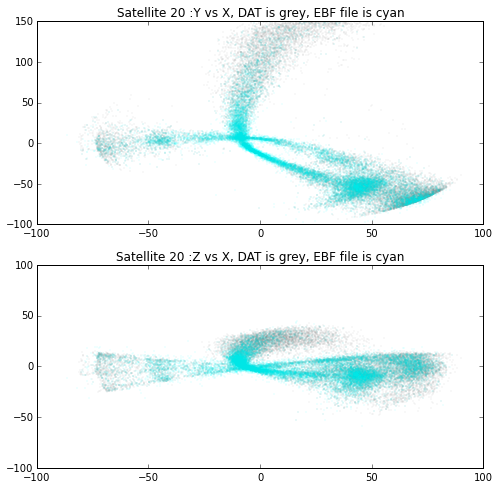

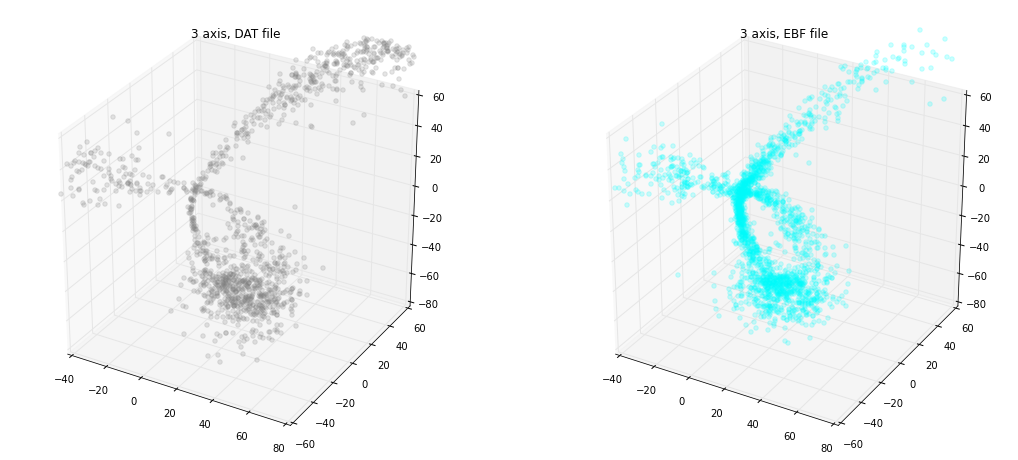

In [162]:
'''Plot me Satellite 20 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)
plt.xlim(-180,-160)
plt.ylim(-20,-5)

length = len(sat_20_dat)

print len(x20)

plt.subplot(2,1,1)
plt.plot(x20,y20,'.',ms=3,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.xlim(-100,100)
plt.ylim(-100,150)

plt.subplot(2,1,2)
plt.plot(x20,z20,'.',ms=3,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-100,100)
plt.ylim(-100,100)

plt.subplot(2,1,1)
pl.plot(x_al_20,y_al_20,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 20 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_20,z_al_20,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 20 :Z vs X, DAT is grey, EBF file is cyan')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_20_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x20[line],y20[line],z20[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_20)

for i in range(len(x_al_20)):
    if i % 10 == 0:
        ax.scatter(x_al_20[i],y_al_20[i],z_al_20[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')

17447
22567


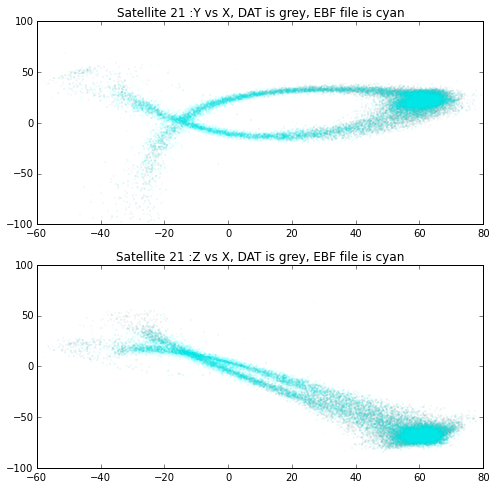

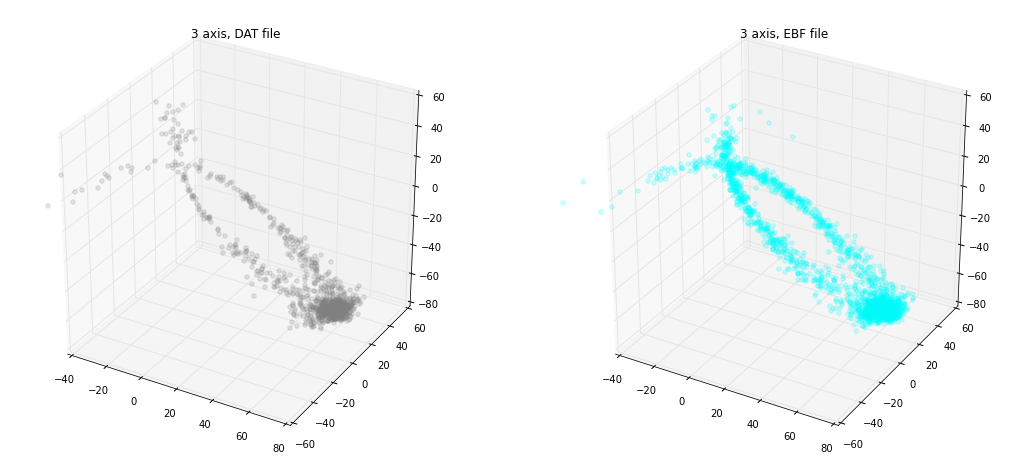

In [161]:
'''Plot me Satellite 21 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)
plt.xlim(-180,-160)
plt.ylim(-20,-5)

length = len(sat_21_dat)

print len(x21)

plt.subplot(2,1,1)
plt.plot(x21,y21,'.',ms=3,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.xlim(-60,80)
plt.ylim(-100,100)

plt.subplot(2,1,2)
plt.plot(x21,z21,'.',ms=3,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-60,80)
plt.ylim(-100,100)

plt.subplot(2,1,1)
pl.plot(x_al_21,y_al_21,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 21 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_21,z_al_21,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 21 :Z vs X, DAT is grey, EBF file is cyan')

#######################################################################################

plt.rcParams['figure.figsize']=(18,8)
length = len(sat_21_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x21[line],y21[line],z21[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_21)

for i in range(len(x_al_21)):
    if i % 10 == 0:
        ax.scatter(x_al_21[i],y_al_21[i],z_al_21[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')

16357
1602730


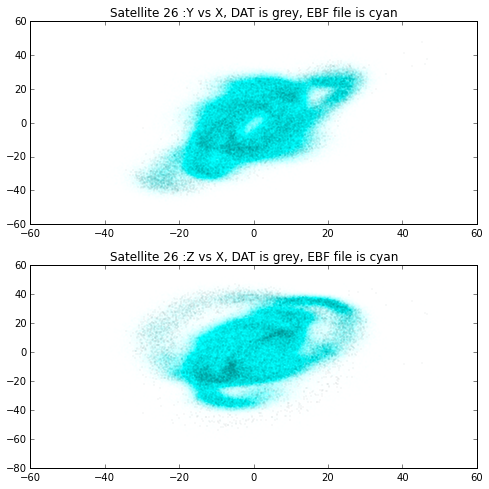

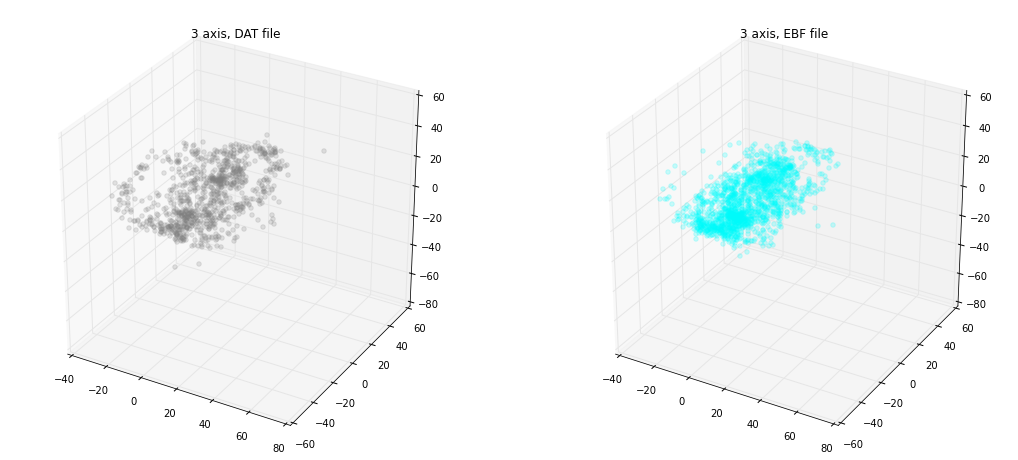

In [160]:
'''Plot me Satellite 26 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)
plt.xlim(-180,-160)
plt.ylim(-20,-5)

length = len(sat_26_dat)

print len(x26)

plt.subplot(2,1,1)
plt.plot(x26,y26,'.',ms=3,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.subplot(2,1,2)
plt.plot(x26,z26,'.',ms=3,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')


plt.subplot(2,1,1)
pl.plot(x_al_26,y_al_26,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 26 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_26,z_al_26,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 26 :Z vs X, DAT is grey, EBF file is cyan')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_26_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x26[line],y26[line],z26[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        
#plt.gcf().savefig('Color_coded_3d.png')

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_26)

for i in range(len(x_al_26)):
    if i % 1000 == 0:
        ax.scatter(x_al_26[i],y_al_26[i],z_al_26[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')   

18778
674527


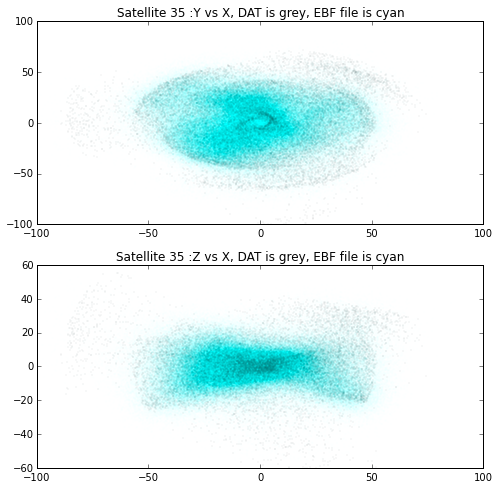

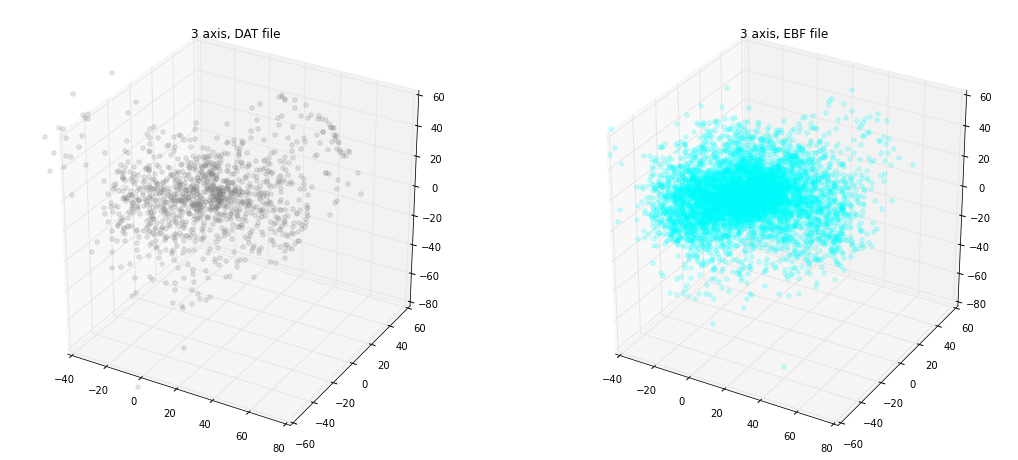

In [159]:
'''Plot me Satellite 35 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)
plt.xlim(-180,-160)
plt.ylim(-20,-5)

length = len(sat_35_dat)

print len(x35)

plt.subplot(2,1,1)
plt.plot(x35,y35,'.',ms=3,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.xlim(-100,100)
plt.ylim(-100,100)

plt.subplot(2,1,2)
plt.plot(x35,z35,'.',ms=3,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-100,100)
plt.ylim(-60,60)

plt.subplot(2,1,1)
pl.plot(x_al_35,y_al_35,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 35 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_35,z_al_35,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 35 :Z vs X, DAT is grey, EBF file is cyan')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_35_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x35[line],y35[line],z35[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        
#plt.gcf().savefig('Color_coded_3d.png')

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_35)

for i in range(len(x_al_35)):
    if i % 100 == 0:
        ax.scatter(x_al_35[i],y_al_35[i],z_al_35[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')

13657
1929846


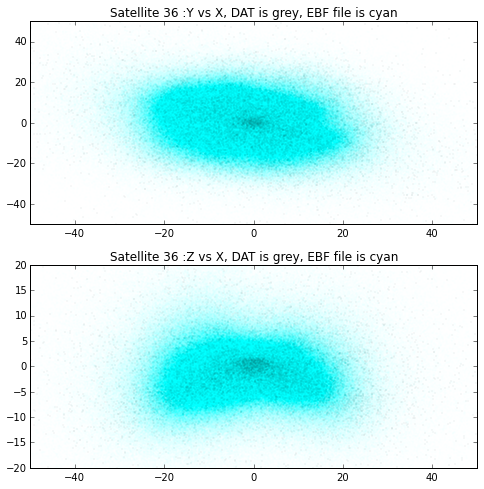

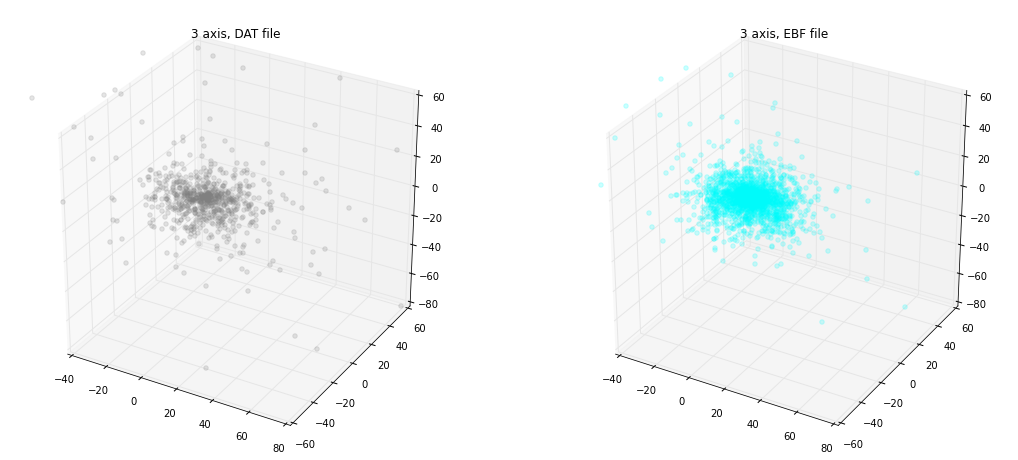

In [164]:
'''Plot me Satellite 36 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)
plt.xlim(-180,-160)
plt.ylim(-20,-5)

length = len(sat_36_dat)

print len(x36)

plt.subplot(2,1,1)
plt.plot(x36,y36,'.',ms=3,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.xlim(-50,50)
plt.ylim(-50,50)

plt.subplot(2,1,2)
plt.plot(x36,z36,'.',ms=3,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-50,50)
plt.ylim(-20,20)

plt.subplot(2,1,1)
pl.plot(x_al_36,y_al_36,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 36 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_36,z_al_36,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 36 :Z vs X, DAT is grey, EBF file is cyan')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_36_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x36[line],y36[line],z36[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_36)

for i in range(len(x_al_36)):
    if i % 1000 == 0:
        ax.scatter(x_al_36[i],y_al_36[i],z_al_36[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')

10419
3484386


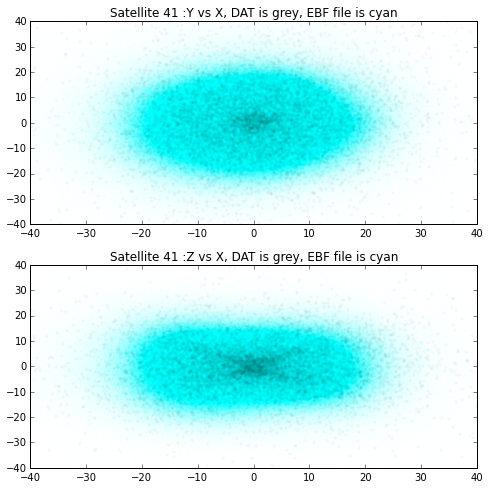

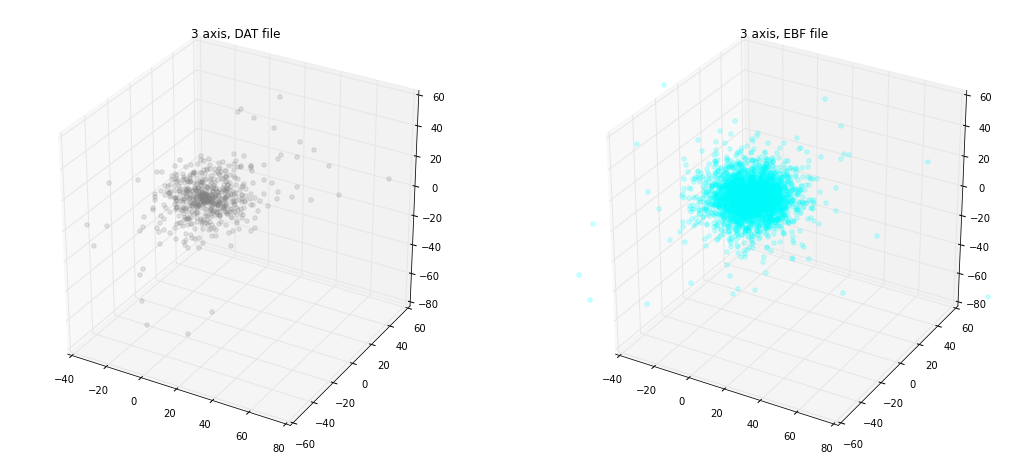

In [165]:
'''Plot me Satellite 41 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)

length = len(sat_41_dat)

print len(x41)

plt.subplot(2,1,1)
plt.plot(x41,y41,'.',ms=5,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.xlim(-40,40)
plt.ylim(-40,40)

plt.subplot(2,1,2)
plt.plot(x41,z41,'.',ms=5,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-40,40)
plt.ylim(-40,40)

plt.subplot(2,1,1)
pl.plot(x_al_41,y_al_41,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 41 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_41,z_al_41,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 41 :Z vs X, DAT is grey, EBF file is cyan')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_41_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x41[line],y41[line],z41[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_41)

for i in range(len(x_al_41)):
    if i % 1000 == 0:
        ax.scatter(x_al_41[i],y_al_41[i],z_al_41[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')   

11398
248285


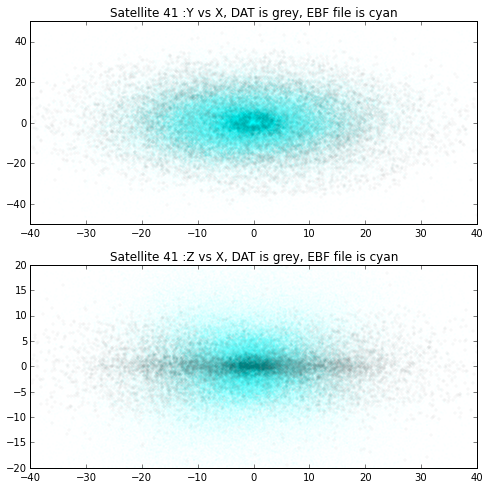

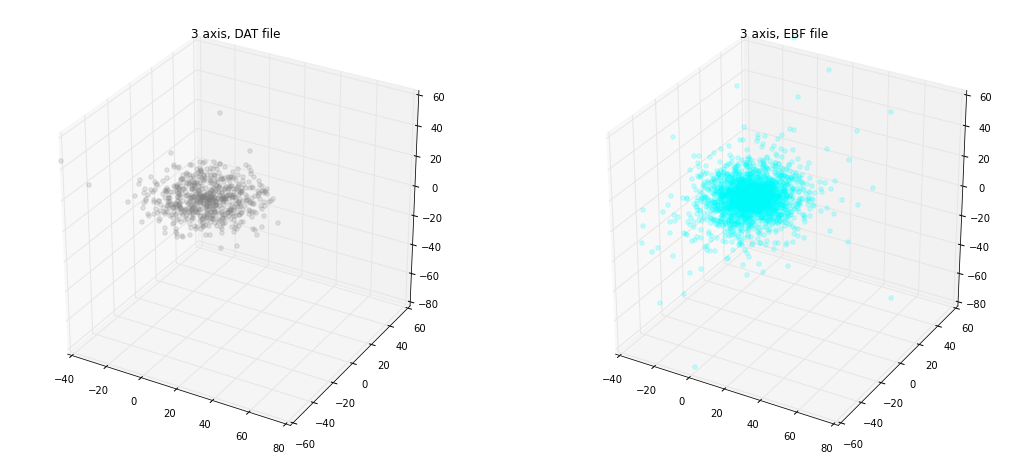

In [166]:
'''Plot me Satellite 55 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)

length = len(sat_55_dat)

print len(x55)

plt.subplot(2,1,1)
plt.plot(x55,y55,'.',ms=5,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.xlim(-40,40)
plt.ylim(-50,50)

plt.subplot(2,1,2)
plt.plot(x55,z55,'.',ms=5,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-40,40)
plt.ylim(-20,20)

plt.subplot(2,1,1)
pl.plot(x_al_55,y_al_55,'.',ms=2,alpha=0.02,color='cyan')
plt.title('Satellite 41 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_55,z_al_55,'.',ms=2,alpha=0.02,color='cyan')
plt.title('Satellite 41 :Z vs X, DAT is grey, EBF file is cyan')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_55_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x55[line],y55[line],z55[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_55)

for i in range(len(x_al_55)):
    if i % 100 == 0:
        ax.scatter(x_al_55[i],y_al_55[i],z_al_55[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')   

11398
765533


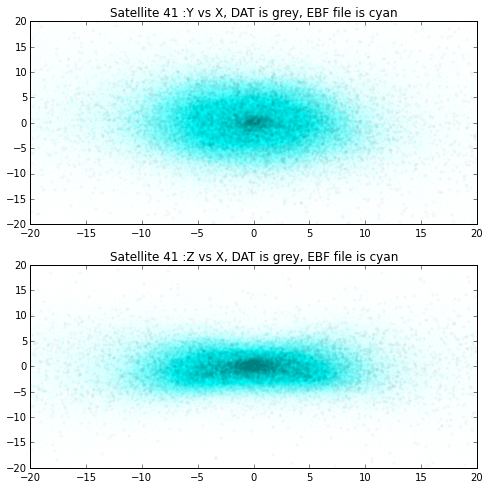

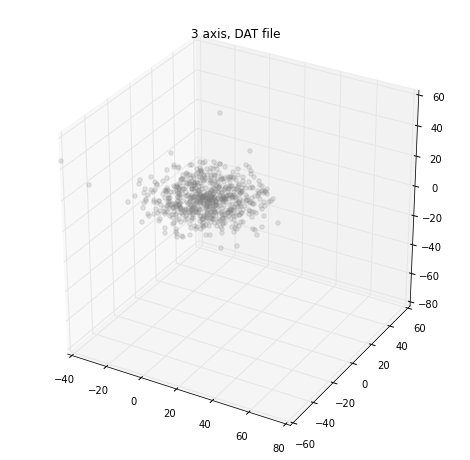

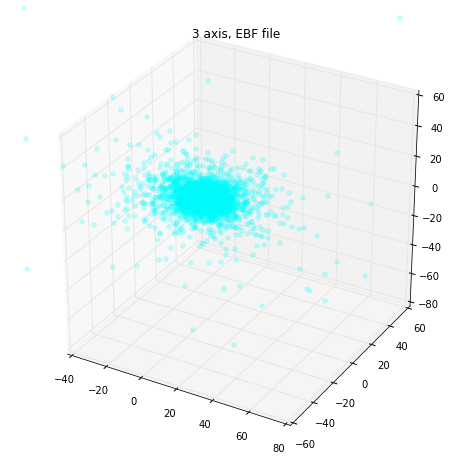

In [77]:
'''Plot me Satellite 81 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)

length = len(sat_81_dat)

print len(x81)

plt.subplot(2,1,1)
plt.plot(x81,y81,'.',ms=5,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.xlim(-20,20)
plt.ylim(-20,20)

plt.subplot(2,1,2)
plt.plot(x81,z81,'.',ms=5,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-20,20)
plt.ylim(-20,20)

plt.subplot(2,1,1)
pl.plot(x_al_81,y_al_81,'.',ms=2,alpha=0.02,color='cyan')
plt.title('Satellite 41 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_81,z_al_81,'.',ms=2,alpha=0.02,color='cyan')
plt.title('Satellite 41 :Z vs X, DAT is grey, EBF file is cyan')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_81_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x55[line],y55[line],z55[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        
plt.gcf().savefig('Color_coded_3d.png')


fig = plt.figure()
ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_81)

for i in range(len(x_al_81)):
    if i % 100 == 0:
        ax.scatter(x_al_81[i],y_al_81[i],z_al_81[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')

23055
183


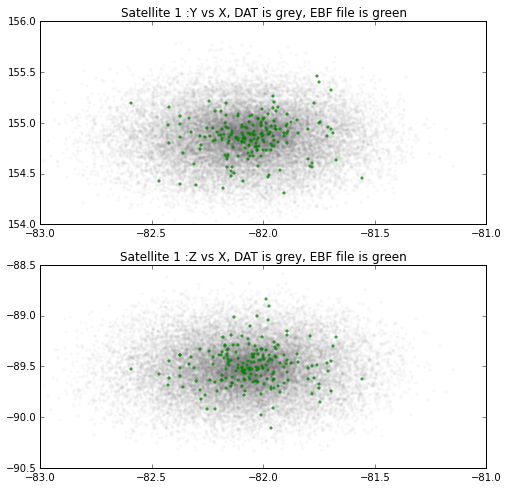

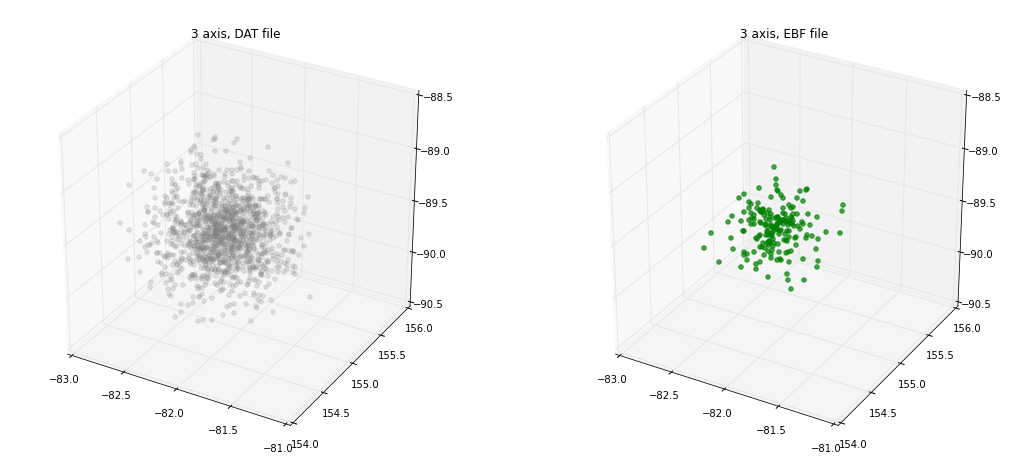

In [168]:
'''Plot me Low Mass Satellite 1 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)

length = len(sat_1_dat)

print len(x1)

plt.subplot(2,1,1)
plt.plot(x1,y1,'.',ms=5,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.xlim(-83,-81)
plt.ylim(154,156)

plt.subplot(2,1,2)
plt.plot(x1,z1,'.',ms=5,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-83,-81)
plt.ylim(-90.5,-88.5)

plt.subplot(2,1,1)
pl.plot(x_al_1,y_al_1,'.',ms=5,alpha=0.7,color='green')
plt.title('Satellite 1 :Y vs X, DAT is grey, EBF file is green')

plt.subplot(2,1,2)
plt.plot(x_al_1,z_al_1,'.',ms=5,alpha=0.7,color='green')
plt.title('Satellite 1 :Z vs X, DAT is grey, EBF file is green')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_1_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-83,-81)
ax.set_ylim(154,156)
ax.set_zlim(-90.5,-88.5)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x1[line],y1[line],z1[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-83,-81)
ax.set_ylim(154,156)
ax.set_zlim(-90.5,-88.5)

print len(x_al_1)

for i in range(len(x_al_1)):
    if i % 1 == 0:
        ax.scatter(x_al_1[i],y_al_1[i],z_al_1[i],alpha=0.7,color='green')
plt.title('3 axis, EBF file')

53936
48


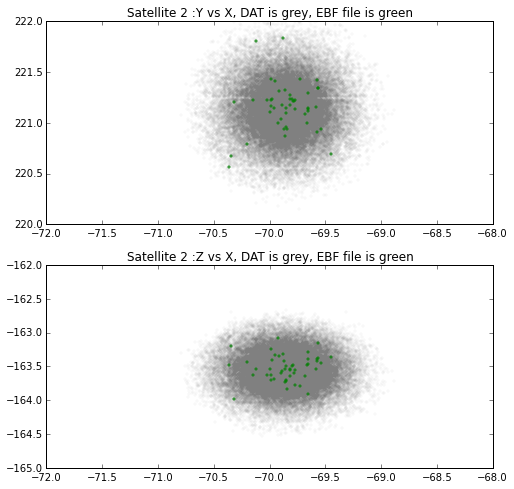

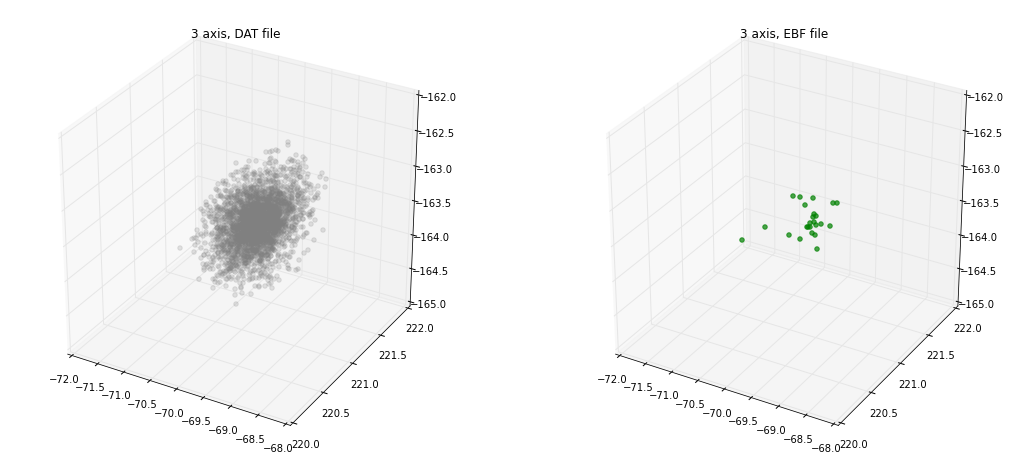

In [169]:
'''Plot me Low Mass Satellite 2 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)

length = len(sat_2_dat)

print len(x2)

plt.subplot(2,1,1)
plt.plot(x2,y2,'.',ms=5,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.xlim(-72,-68)
plt.ylim(220,222)

plt.subplot(2,1,2)
plt.plot(x2,z2,'.',ms=5,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-72,-68)
plt.ylim(-165,-162)

plt.subplot(2,1,1)
pl.plot(x_al_2,y_al_2,'.',ms=5,alpha=0.7,color='green')
plt.title('Satellite 2 :Y vs X, DAT is grey, EBF file is green')

plt.subplot(2,1,2)
plt.plot(x_al_2,z_al_2,'.',ms=5,alpha=0.7,color='green')
plt.title('Satellite 2 :Z vs X, DAT is grey, EBF file is green')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_2_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-72,-68)
ax.set_ylim(220,222)
ax.set_zlim(-165,-162)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x2[line],y2[line],z2[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-72,-68)
ax.set_ylim(220,222)
ax.set_zlim(-165,-162)

print len(x_al_2)

for i in range(len(x_al_2)):
    if i % 2 == 0:
        ax.scatter(x_al_2[i],y_al_2[i],z_al_2[i],alpha=0.7,color='green')
plt.title('3 axis, EBF file')

47205
146


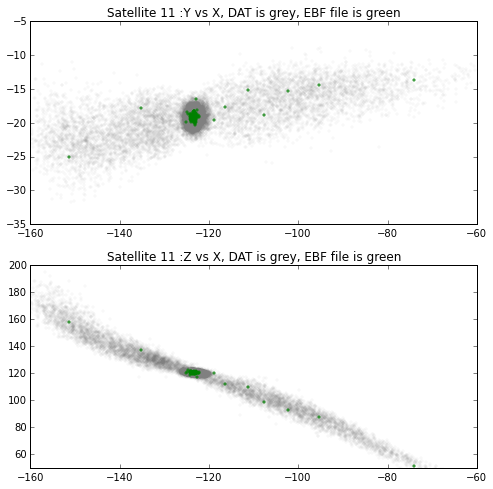

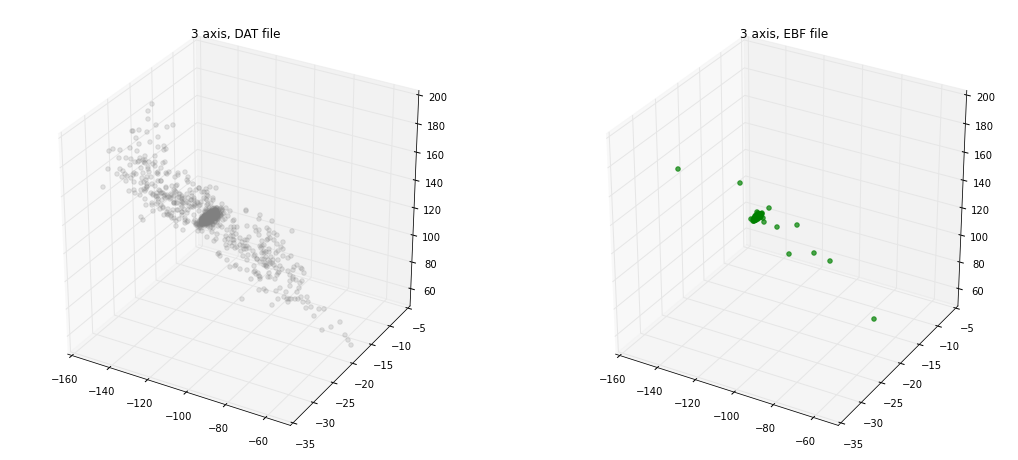

In [170]:
'''Plot me Low Mass Satellite 11 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)

length = len(sat_11_dat)

print len(x11)

plt.subplot(2,1,1)
plt.plot(x11,y11,'.',ms=5,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.xlim(-160,-60)
plt.ylim(-35,-5)

plt.subplot(2,1,2)
plt.plot(x11,z11,'.',ms=5,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-160,-60)
plt.ylim(50,200)

plt.subplot(2,1,1)
pl.plot(x_al_11,y_al_11,'.',ms=5,alpha=0.7,color='green')
plt.title('Satellite 11 :Y vs X, DAT is grey, EBF file is green')

plt.subplot(2,1,2)
plt.plot(x_al_11,z_al_11,'.',ms=5,alpha=0.7,color='green')
plt.title('Satellite 11 :Z vs X, DAT is grey, EBF file is green')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_11_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-160,-50)
ax.set_ylim(-35,-5)
ax.set_zlim(50,200)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x11[line],y11[line],z11[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-160,-50)
ax.set_ylim(-35,-5)
ax.set_zlim(50,200)

print len(x_al_11)

for i in range(len(x_al_11)):
    if i % 1 == 0:
        ax.scatter(x_al_11[i],y_al_11[i],z_al_11[i],alpha=0.7,color='green')
plt.title('3 axis, EBF file')

18778
249


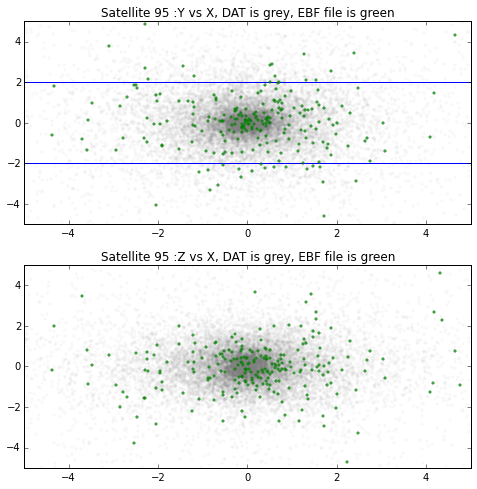

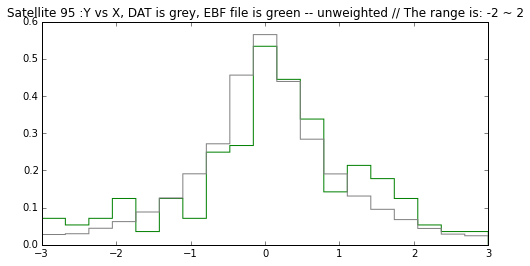

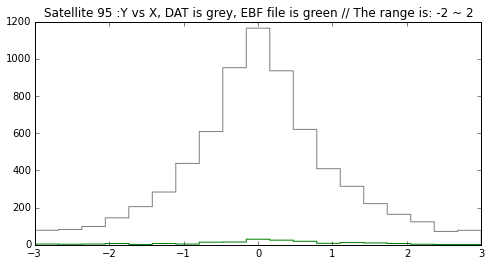

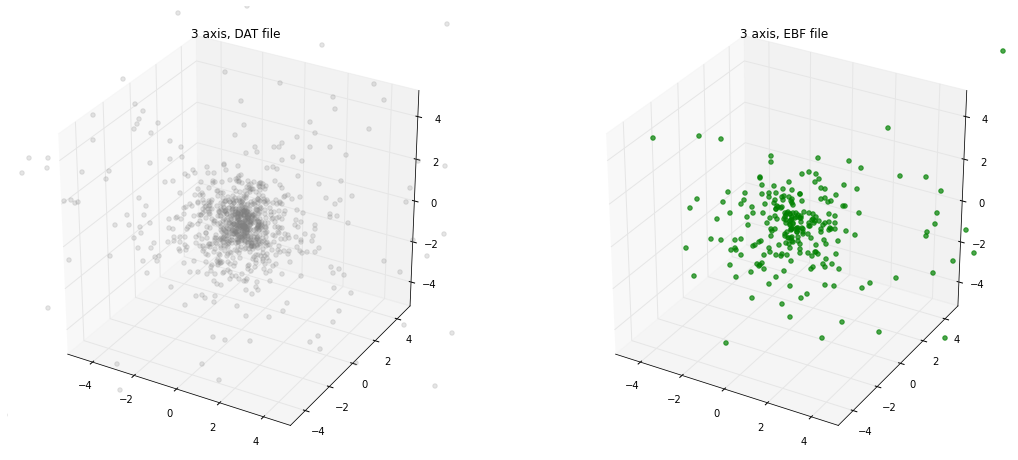

In [171]:
'''Plot me Low Mass Satellite 95 in 2d, and 3d'''
low = -2
upp = 2

plt.rcParams['figure.figsize']=(8,8)

length = len(sat_95_dat)

print len(x95)

plt.subplot(2,1,1)
plt.plot(x95,y95,'.',ms=5,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')
plt.axhline(y=low)
plt.axhline(y=upp)
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.subplot(2,1,2)
plt.plot(x95,z95,'.',ms=5,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.subplot(2,1,1)
pl.plot(x_al_95,y_al_95,'.',ms=5,alpha=0.7,color='green')
plt.title('Satellite 95 :Y vs X, DAT is grey, EBF file is green')

plt.subplot(2,1,2)
plt.plot(x_al_95,z_al_95,'.',ms=5,alpha=0.7,color='green')
plt.title('Satellite 95 :Z vs X, DAT is grey, EBF file is green')



#######################################################################################
low = -2
upp = 2

x95_hist = []
x_al_95_hist = []
m95_hist = []
m_al_95_hist = []
for i in range(len(x95)):
    if y95[i] > low and y95[i]<upp:
        x95_hist.append(x95[i])
        m95_hist.append(m95[i])
        
for j in range(len(x_al_95)):
    if y_al_95[j] > low and y_al_95[j]<upp:
        x_al_95_hist.append(x_al_95[j])
        m_al_95_hist.append(m_al_95[j])
        
        
hist_low = -3
hist_upp = 3

bins = np.linspace(hist_low,hist_upp,20)        
plt.rcParams['figure.figsize']=(8,4)
fig=plt.figure()
plt.hist(x_al_95_hist,normed=True, bins = bins, histtype='step', color = 'green', alpha = 1)
plt.title('Satellite 95 :Y vs X, DAT is grey, EBF file is green -- unweighted // The range is: -2 ~ 2')
plt.hist(x95_hist,normed=True, bins = bins, histtype='step', color = 'grey',alpha = 1)

fig=plt.figure()
plt.hist(x_al_95_hist, bins = bins, histtype='step', color = 'green', alpha = 1)
plt.title('Satellite 95 :Y vs X, DAT is grey, EBF file is green // The range is: -2 ~ 2')
plt.hist(x95_hist, bins = bins, histtype='step', color = 'grey',alpha = 1, weights = m95_hist)
#########################################################################################

plt.rcParams['figure.figsize']=(18,8)
length = len(sat_95_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x95[line],y95[line],z95[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)

print len(x_al_95)

for i in range(len(x_al_95)):
    if i % 1 == 0:
        ax.scatter(x_al_95[i],y_al_95[i],z_al_95[i],alpha=0.7,color='green')
plt.title('3 axis, EBF file')

18778
675


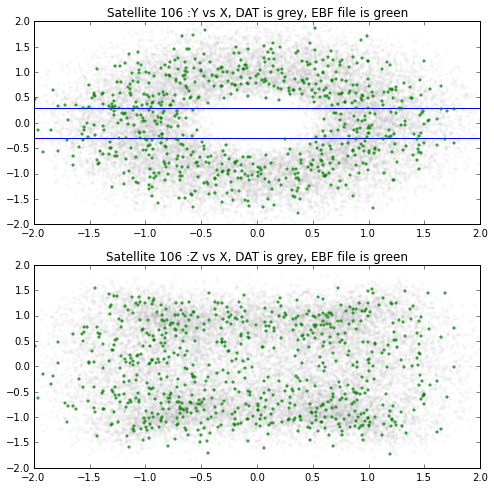

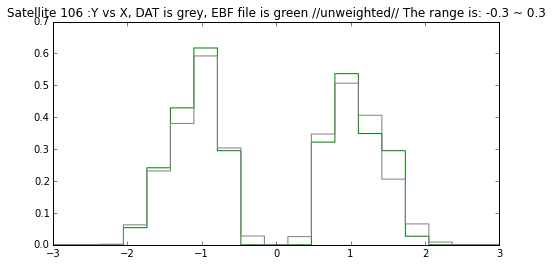

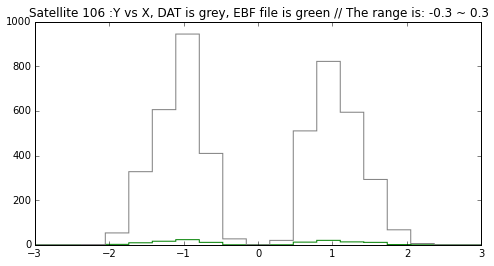

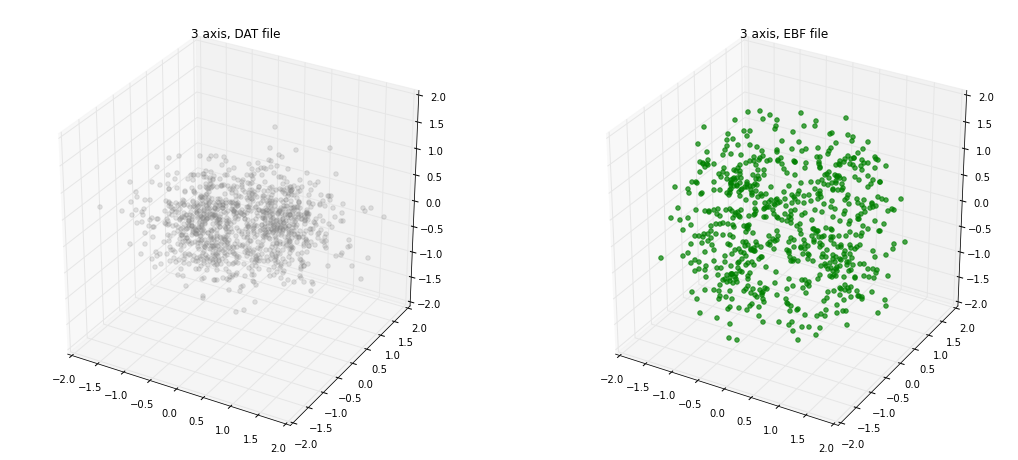

In [172]:
'''Plot me Low Mass Satellite 106 in 2d, and 3d'''
low = -0.3
upp = 0.3

plt.rcParams['figure.figsize']=(8,8)

length = len(sat_106_dat)

print len(x106)

plt.subplot(2,1,1)
plt.plot(x106,y106,'.',ms=5,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')
plt.axhline(y=low)
plt.axhline(y=upp)

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.subplot(2,1,2)
plt.plot(x106,z106,'.',ms=5,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.subplot(2,1,1)
pl.plot(x_al_106,y_al_106,'.',ms=5,alpha=0.7,color='green')
plt.title('Satellite 106 :Y vs X, DAT is grey, EBF file is green')

plt.subplot(2,1,2)
plt.plot(x_al_106,z_al_106,'.',ms=5,alpha=0.7,color='green')
plt.title('Satellite 106 :Z vs X, DAT is grey, EBF file is green')

#######################################################################################

x106_hist = []
x_al_106_hist = []
m106_hist = []
m_al_106_hist = []

for i in range(len(x106)):
    if y106[i] > low and y106[i]<upp:
        x106_hist.append(x106[i])
        m106_hist.append(m106[i])
        
for j in range(len(x_al_106)):
    if y_al_106[j] > low and y_al_106[j]<upp:
        x_al_106_hist.append(x_al_106[j])
        m_al_106_hist.append(m_al_106[j])
        
hist_low = -3
hist_upp = 3
             
bins = np.linspace(hist_low,hist_upp, 20)          
plt.rcParams['figure.figsize']=(8,4)
fig=plt.figure()
plt.hist(x_al_106_hist,normed=True, bins = bins, histtype='step', color = 'green', alpha = 1)
plt.title('Satellite 106 :Y vs X, DAT is grey, EBF file is green //unweighted// The range is: -0.3 ~ 0.3')
plt.hist(x106_hist,normed=True, bins = bins, histtype='step', color = 'grey',alpha = 1)

fig=plt.figure()
plt.hist(x_al_106_hist,bins = bins, histtype='step', color = 'green', alpha = 1)
plt.title('Satellite 106 :Y vs X, DAT is grey, EBF file is green // The range is: -0.3 ~ 0.3')
plt.hist(x106_hist, bins = bins, histtype='step', color = 'grey',alpha = 1, weights = m106_hist)
#########################################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_106_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x107[line],y107[line],z107[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

print len(x_al_106)

for i in range(len(x_al_106)):
    if i % 1 == 0:
        ax.scatter(x_al_106[i],y_al_106[i],z_al_106[i],alpha=0.7,color='green')
plt.title('3 axis, EBF file')

18778
275


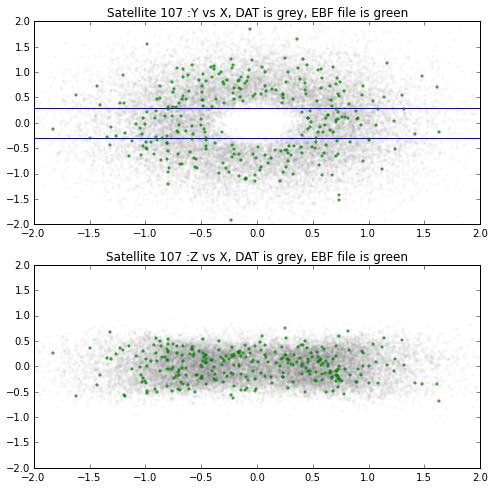

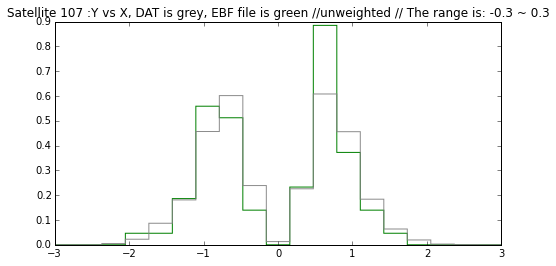

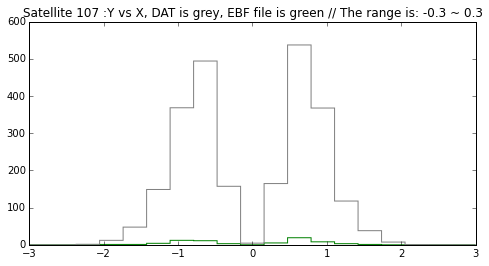

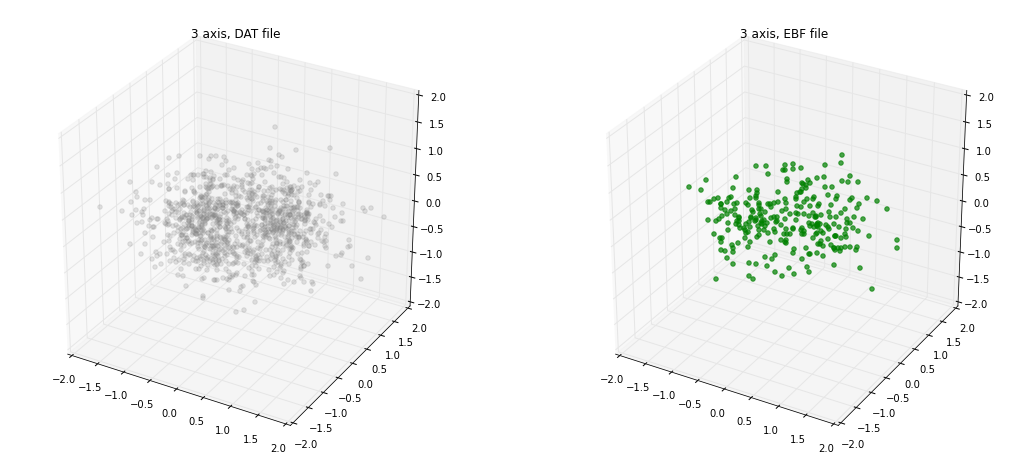

In [173]:
'''Plot me Low Mass Satellite 107 in 2d, and 3d'''
low = -0.3
upp = 0.3

plt.rcParams['figure.figsize']=(8,8)

length = len(sat_107_dat)

print len(x107)

plt.subplot(2,1,1)
plt.plot(x107,y107,'.',ms=5,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')
plt.axhline(y=low)
plt.axhline(y=upp)
plt.xlim(-2,2)
plt.ylim(-2,2)

plt.subplot(2,1,2)
plt.plot(x107,z107,'.',ms=5,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.subplot(2,1,1)
pl.plot(x_al_107,y_al_107,'.',ms=5,alpha=0.7,color='green')
plt.title('Satellite 107 :Y vs X, DAT is grey, EBF file is green')

plt.subplot(2,1,2)
plt.plot(x_al_107,z_al_107,'.',ms=5,alpha=0.7,color='green')
plt.title('Satellite 107 :Z vs X, DAT is grey, EBF file is green')

#######################################################################################


x107_hist = []
x_al_107_hist = []
m107_hist = []
m_al_107_hist = []

for i in range(len(x107)):
    if y107[i] > low and y107[i]<upp:
        x107_hist.append(x107[i])
        m107_hist.append(m107[i])
        
for j in range(len(x_al_107)):
    if y_al_107[j] > low and y_al_107[j]<upp:
        x_al_107_hist.append(x_al_107[j])
        m_al_107_hist.append(m_al_107[j]) 

hist_low = -3
hist_upp = 3
bins = np.linspace(hist_low,hist_upp, 20)        
plt.rcParams['figure.figsize']=(8,4)
fig=plt.figure()
plt.hist(x_al_107_hist,normed=True, bins = bins, histtype='step', color = 'green', alpha = 1)
plt.title('Satellite 107 :Y vs X, DAT is grey, EBF file is green //unweighted // The range is: -0.3 ~ 0.3')
plt.hist(x107_hist,normed=True, bins = bins, histtype='step', color = 'grey',alpha = 0.9)

fig=plt.figure()
plt.hist(x_al_107_hist, bins = bins, histtype='step', color = 'green', alpha = 1)
plt.title('Satellite 107 :Y vs X, DAT is grey, EBF file is green // The range is: -0.3 ~ 0.3')
plt.hist(x107_hist, bins = bins, histtype='step', color = 'grey',alpha = 1, weights = m107_hist)
#########################################################################################

plt.rcParams['figure.figsize']=(18,8)
length = len(sat_107_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x107[line],y107[line],z107[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

print len(x_al_107)

for i in range(len(x_al_107)):
    if i % 1 == 0:
        ax.scatter(x_al_107[i],y_al_107[i],z_al_107[i],alpha=0.7,color='green')
plt.title('3 axis, EBF file')

73411
640


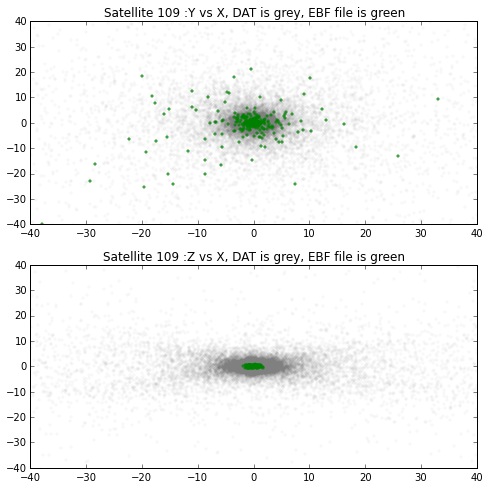

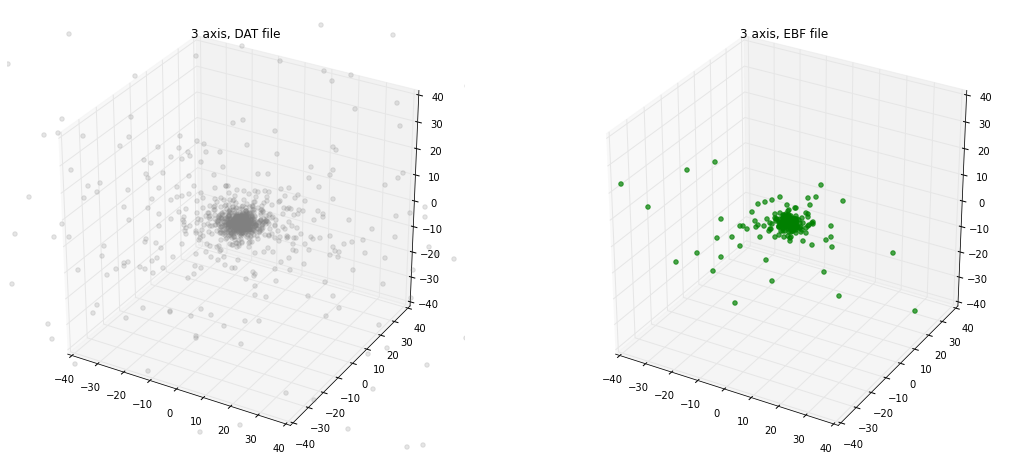

In [174]:
'''Plot me Low Mass Satellite 109 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)

length = len(sat_109_dat)

print len(x109)

plt.subplot(2,1,1)
plt.plot(x109,y109,'.',ms=5,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.xlim(-40,40)
plt.ylim(-40,40)

plt.subplot(2,1,2)
plt.plot(x109,z109,'.',ms=5,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-40,40)
plt.ylim(-40,40)

plt.subplot(2,1,1)
pl.plot(x_al_109,y_al_109,'.',ms=5,alpha=0.7,color='green')
plt.title('Satellite 109 :Y vs X, DAT is grey, EBF file is green')

plt.subplot(2,1,2)
plt.plot(x_al_107,z_al_107,'.',ms=5,alpha=0.7,color='green')
plt.title('Satellite 109 :Z vs X, DAT is grey, EBF file is green')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_109_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,40)
ax.set_ylim(-40,40)
ax.set_zlim(-40,40)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x109[line],y109[line],z109[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,40)
ax.set_ylim(-40,40)
ax.set_zlim(-40,40)

print len(x_al_109)

for i in range(len(x_al_109)):
    if i % 1 == 0:
        ax.scatter(x_al_109[i],y_al_109[i],z_al_109[i],alpha=0.7,color='green')
plt.title('3 axis, EBF file')

17447
22567


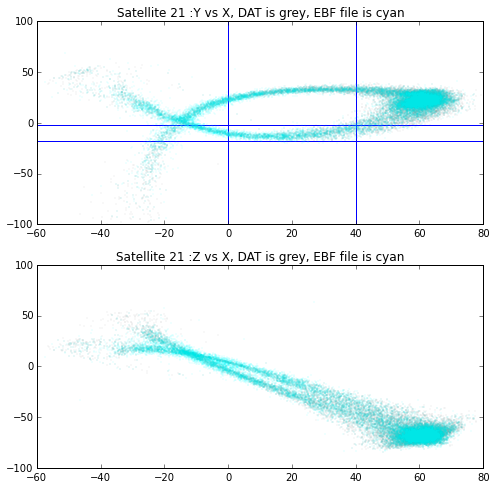

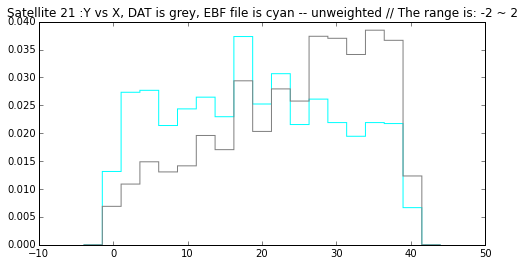

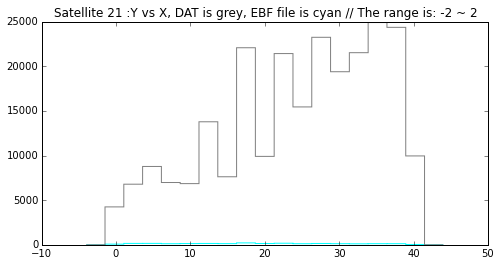

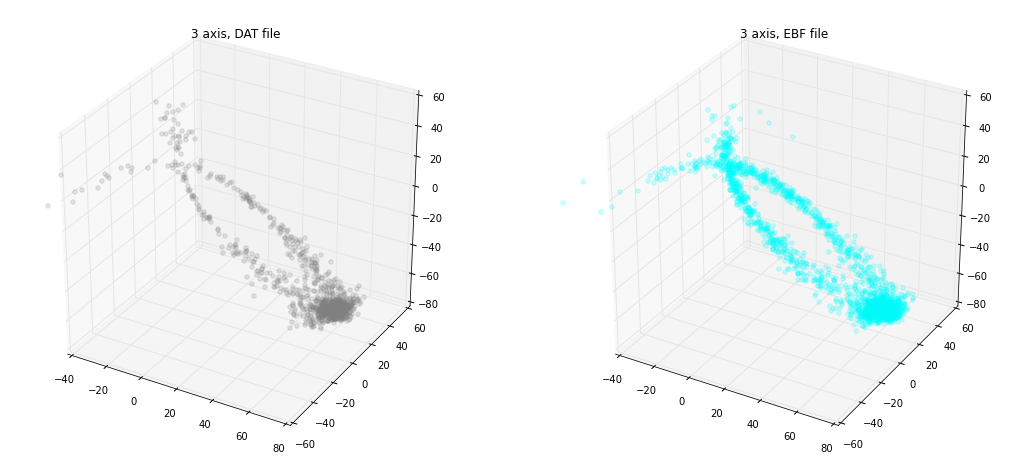

In [151]:
'''Plot me Satellite 21 in 2d, and 3d -- Thin Stream Galaxy'''
ylow = -18
yupp = -2

xlow=0
xupp=40

plt.rcParams['figure.figsize']=(8,8)
plt.xlim(-180,-160)
plt.ylim(-20,-5)

length = len(sat_21_dat)

print len(x21)

plt.subplot(2,1,1)
plt.plot(x21,y21,'.',ms=3,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')
plt.axhline(y=ylow)
plt.axhline(y=yupp)
plt.axvline(x=xlow)
plt.axvline(x=xupp)

plt.xlim(-60,80)
plt.ylim(-100,100)

plt.subplot(2,1,2)
plt.plot(x21,z21,'.',ms=3,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-60,80)
plt.ylim(-100,100)

plt.subplot(2,1,1)
pl.plot(x_al_21,y_al_21,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 21 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_21,z_al_21,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 21 :Z vs X, DAT is grey, EBF file is cyan')

#######################################################################################


x21_hist = []
x_al_21_hist = []
m21_hist = []
m_al_21_hist = []
for i in range(len(x21)):
    if y21[i] > ylow and y21[i]<yupp:
        if x21[i] > xlow and x21[i]<xupp:
            x21_hist.append(x21[i])
            m21_hist.append(m21[i])
        
for j in range(len(x_al_21)):
    if y_al_21[j] > ylow and y_al_21[j]<yupp:
        if x_al_21[j] > xlow and x_al_21[j]<xupp:
            x_al_21_hist.append(x_al_21[j])
            m_al_21_hist.append(m_al_21[j])

hist_low = xlow - (xupp-xlow)/10
hist_upp = xupp + (xupp-xlow)/10

bins = np.linspace(hist_low,hist_upp,20) 

plt.rcParams['figure.figsize']=(8,4)
fig=plt.figure()
plt.hist(x_al_21_hist,normed=True, bins = bins, histtype='step', color = 'cyan', alpha = 1)
plt.title('Satellite 21 :Y vs X, DAT is grey, EBF file is cyan -- unweighted // The range is: -2 ~ 2')
plt.hist(x21_hist,normed=True, bins = bins, histtype='step', color = 'grey',alpha = 1)

fig=plt.figure()
plt.hist(x_al_21_hist, bins = bins, histtype='step', color = 'cyan', alpha = 1)
plt.title('Satellite 21 :Y vs X, DAT is grey, EBF file is cyan // The range is: -2 ~ 2')
plt.hist(x21_hist, bins = bins, histtype='step', color = 'grey',alpha = 1, weights = m21_hist)
#########################################################################################

plt.rcParams['figure.figsize']=(18,8)
length = len(sat_21_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x21[line],y21[line],z21[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_21)

for i in range(len(x_al_21)):
    if i % 10 == 0:
        ax.scatter(x_al_21[i],y_al_21[i],z_al_21[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')

17447
22567


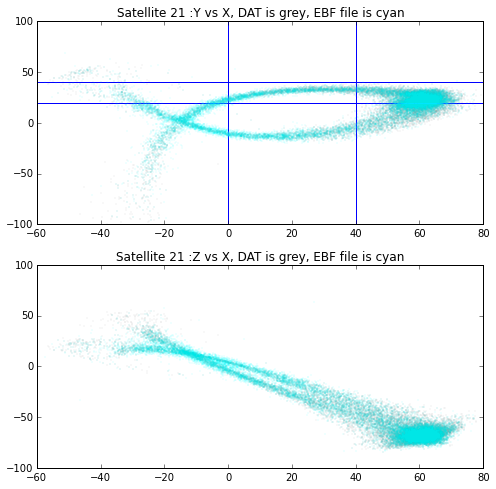

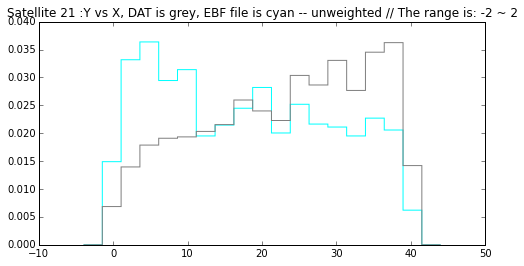

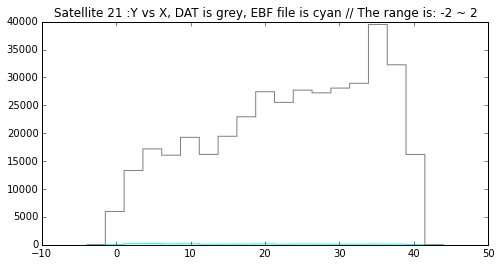

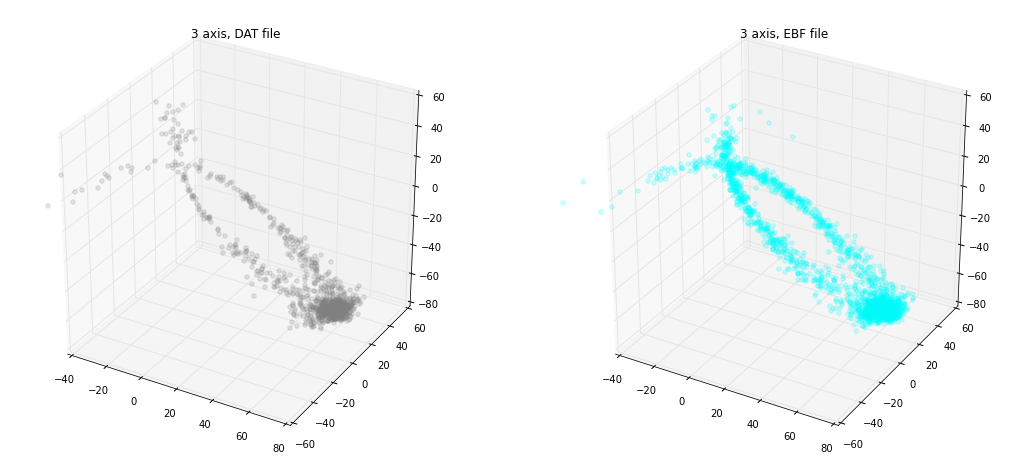

In [152]:
'''Plot me Satellite 21 in 2d, and 3d -- Thin Stream Galaxy'''
ylow = 20
yupp = 40

xlow=0
xupp=40

plt.rcParams['figure.figsize']=(8,8)
plt.xlim(-180,-160)
plt.ylim(-20,-5)

length = len(sat_21_dat)

print len(x21)

plt.subplot(2,1,1)
plt.plot(x21,y21,'.',ms=3,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')
plt.axhline(y=ylow)
plt.axhline(y=yupp)
plt.axvline(x=xlow)
plt.axvline(x=xupp)

plt.xlim(-60,80)
plt.ylim(-100,100)

plt.subplot(2,1,2)
plt.plot(x21,z21,'.',ms=3,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-60,80)
plt.ylim(-100,100)

plt.subplot(2,1,1)
pl.plot(x_al_21,y_al_21,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 21 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_21,z_al_21,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 21 :Z vs X, DAT is grey, EBF file is cyan')

#######################################################################################


x21_hist = []
x_al_21_hist = []
m21_hist = []
m_al_21_hist = []
for i in range(len(x21)):
    if y21[i] > ylow and y21[i]<yupp:
        if x21[i] > xlow and x21[i]<xupp:
            x21_hist.append(x21[i])
            m21_hist.append(m21[i])
        
for j in range(len(x_al_21)):
    if y_al_21[j] > ylow and y_al_21[j]<yupp:
        if x_al_21[j] > xlow and x_al_21[j]<xupp:
            x_al_21_hist.append(x_al_21[j])
            m_al_21_hist.append(m_al_21[j])

hist_low = xlow - (xupp-xlow)/10
hist_upp = xupp + (xupp-xlow)/10

bins = np.linspace(hist_low,hist_upp,20)        
plt.rcParams['figure.figsize']=(8,4)
fig=plt.figure()
plt.hist(x_al_21_hist,normed=True, bins = bins, histtype='step', color = 'cyan', alpha = 1)
plt.title('Satellite 21 :Y vs X, DAT is grey, EBF file is cyan -- unweighted // The range is: -2 ~ 2')
plt.hist(x21_hist,normed=True, bins = bins, histtype='step', color = 'grey',alpha = 1)

fig=plt.figure()
plt.hist(x_al_21_hist, bins = bins, histtype='step', color = 'cyan', alpha = 1)
plt.title('Satellite 21 :Y vs X, DAT is grey, EBF file is cyan // The range is: -2 ~ 2')
plt.hist(x21_hist, bins = bins, histtype='step', color = 'grey',alpha = 1, weights = m21_hist)
#########################################################################################

plt.rcParams['figure.figsize']=(18,8)
length = len(sat_21_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x21[line],y21[line],z21[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

#fig = plt.figure()
ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_21)

for i in range(len(x_al_21)):
    if i % 10 == 0:
        ax.scatter(x_al_21[i],y_al_21[i],z_al_21[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')

17447
22567


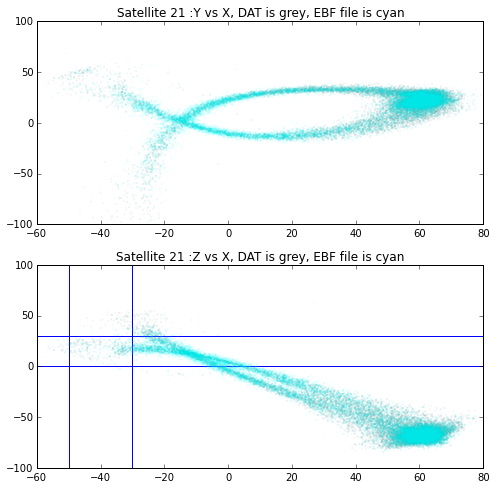

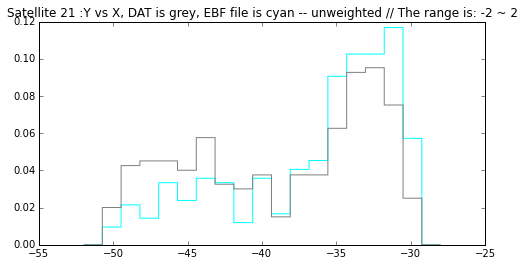

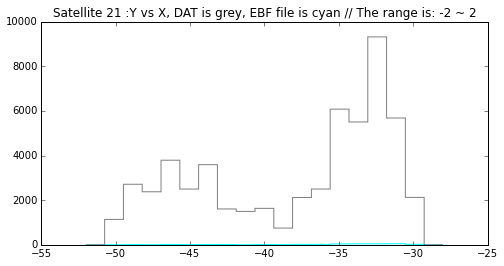

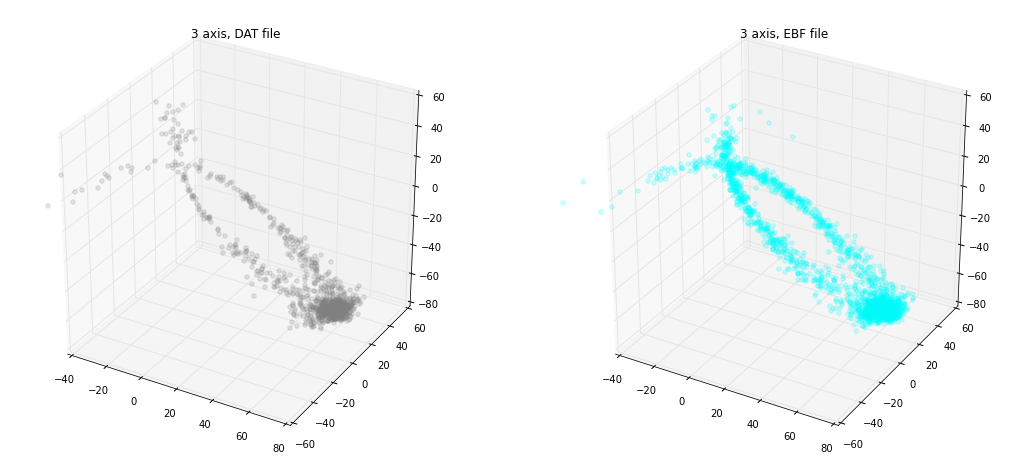

In [153]:
'''Plot me Satellite 21 in 2d, and 3d -- Thin Stream Galaxy'''
ylow = 20
yupp = 40

xlow=-50
xupp=-30 

zlow= 0
zupp= 30

plt.rcParams['figure.figsize']=(8,8)
plt.xlim(-180,-160)
plt.ylim(-20,-5)

length = len(sat_21_dat)

print len(x21)

plt.subplot(2,1,1)
plt.plot(x21,y21,'.',ms=3,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')
#plt.axhline(y=ylow)
#plt.axhline(y=yupp)
#plt.axvline(x=xlow)
#plt.axvline(x=xupp)

plt.xlim(-60,80)
plt.ylim(-100,100)

plt.subplot(2,1,2)
plt.plot(x21,z21,'.',ms=3,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')
plt.axhline(y=zlow)
plt.axhline(y=zupp)
plt.axvline(x=xlow)
plt.axvline(x=xupp)

plt.xlim(-60,80)
plt.ylim(-100,100)

plt.subplot(2,1,1)
pl.plot(x_al_21,y_al_21,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 21 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_21,z_al_21,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 21 :Z vs X, DAT is grey, EBF file is cyan')

#######################################################################################


x21_hist = []
x_al_21_hist = []
m21_hist = []
m_al_21_hist = []

#for i in range(len(x21)):
#    if y21[i] > ylow and y21[i]<yupp:
#        if x21[i] > xlow and x21[i]<xupp:
#            x21_hist.append(x21[i])
#            m21_hist.append(m21[i])
        
#for j in range(len(x_al_21)):
#    if y_al_21[j] > ylow and y_al_21[j]<yupp:
#        if x_al_21[j] > xlow and x_al_21[j]<xupp:
#            x_al_21_hist.append(x_al_21[j])
#            m_al_21_hist.append(m_al_21[j])

for i in range(len(x21)):
    if z21[i] > zlow and z21[i]<yupp:
        if x21[i] > xlow and x21[i]<xupp:
            x21_hist.append(x21[i])
            m21_hist.append(m21[i])
        
for j in range(len(x_al_21)):
    if z_al_21[j] > zlow and z_al_21[j]<yupp:
        if x_al_21[j] > xlow and x_al_21[j]<xupp:
            x_al_21_hist.append(x_al_21[j])
            m_al_21_hist.append(m_al_21[j])            
            
            
hist_low = xlow - (xupp-xlow)/10
hist_upp = xupp + (xupp-xlow)/10

bins = np.linspace(hist_low,hist_upp,20)        
plt.rcParams['figure.figsize']=(8,4)
fig=plt.figure()
plt.hist(x_al_21_hist,normed=True, bins = bins, histtype='step', color = 'cyan', alpha = 1)
plt.title('Satellite 21 :Y vs X, DAT is grey, EBF file is cyan -- unweighted // The range is: -2 ~ 2')
plt.hist(x21_hist,normed=True, bins = bins, histtype='step', color = 'grey',alpha = 1)

fig=plt.figure()
plt.hist(x_al_21_hist, bins = bins, histtype='step', color = 'cyan', alpha = 1)
plt.title('Satellite 21 :Y vs X, DAT is grey, EBF file is cyan // The range is: -2 ~ 2')
plt.hist(x21_hist, bins = bins, histtype='step', color = 'grey',alpha = 1, weights = m21_hist)
#########################################################################################

plt.rcParams['figure.figsize']=(18,8)
length = len(sat_21_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x21[line],y21[line],z21[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

#fig = plt.figure()
ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_21)

for i in range(len(x_al_21)):
    if i % 10 == 0:
        ax.scatter(x_al_21[i],y_al_21[i],z_al_21[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')

17447
22567


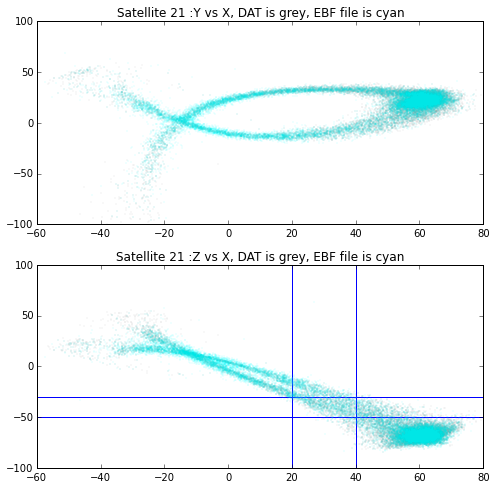

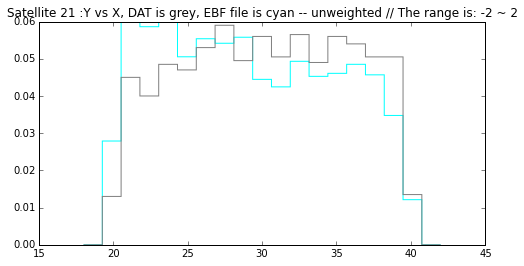

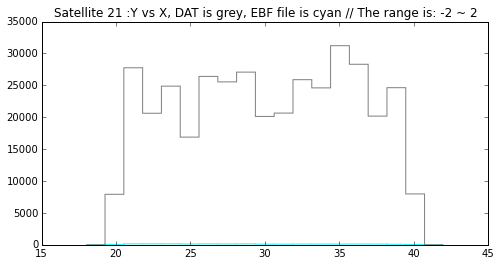

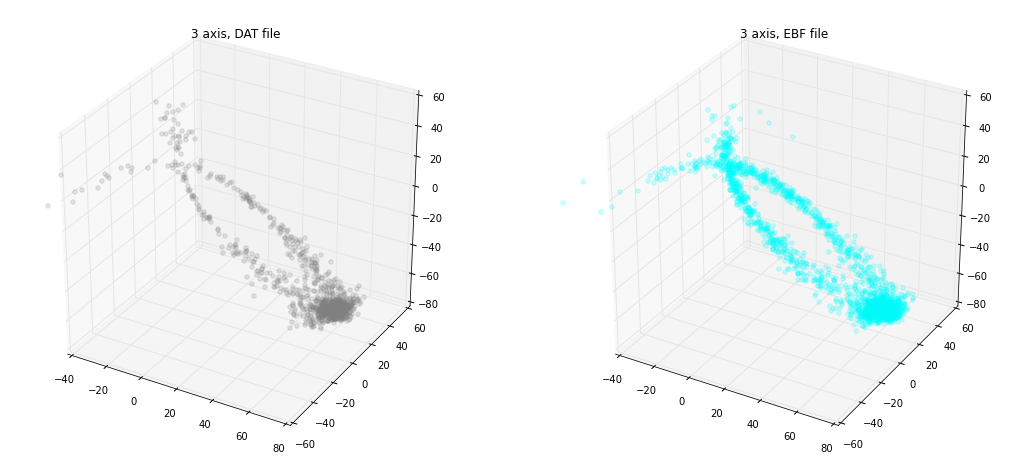

In [179]:
'''Plot me Satellite 21 in 2d, and 3d -- Thin Stream Galaxy'''
ylow = 20
yupp = 40

xlow=20
xupp=40 

zlow= -50
zupp= -30

plt.rcParams['figure.figsize']=(8,8)
plt.xlim(-180,-160)
plt.ylim(-20,-5)

length = len(sat_21_dat)

print len(x21)

plt.subplot(2,1,1)
plt.plot(x21,y21,'.',ms=3,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')
#plt.axhline(y=ylow)
#plt.axhline(y=yupp)
#plt.axvline(x=xlow)
#plt.axvline(x=xupp)

plt.xlim(-60,80)
plt.ylim(-100,100)

plt.subplot(2,1,2)
plt.plot(x21,z21,'.',ms=3,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')
plt.axhline(y=zlow)
plt.axhline(y=zupp)
plt.axvline(x=xlow)
plt.axvline(x=xupp)

plt.xlim(-60,80)
plt.ylim(-100,100)

plt.subplot(2,1,1)
pl.plot(x_al_21,y_al_21,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 21 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_21,z_al_21,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 21 :Z vs X, DAT is grey, EBF file is cyan')

#######################################################################################
x21_hist = []
x_al_21_hist = []
m21_hist = []
m_al_21_hist = []

#for i in range(len(x21)):
#    if y21[i] > ylow and y21[i]<yupp:
#        if x21[i] > xlow and x21[i]<xupp:
#            x21_hist.append(x21[i])
#            m21_hist.append(m21[i])
        
#for j in range(len(x_al_21)):
#    if y_al_21[j] > ylow and y_al_21[j]<yupp:
#        if x_al_21[j] > xlow and x_al_21[j]<xupp:
#            x_al_21_hist.append(x_al_21[j])
#            m_al_21_hist.append(m_al_21[j])

for i in range(len(x21)):
    if z21[i] > zlow and z21[i]<yupp:
        if x21[i] > xlow and x21[i]<xupp:
            x21_hist.append(x21[i])
            m21_hist.append(m21[i])
        
for j in range(len(x_al_21)):
    if z_al_21[j] > zlow and z_al_21[j]<yupp:
        if x_al_21[j] > xlow and x_al_21[j]<xupp:
            x_al_21_hist.append(x_al_21[j])
            m_al_21_hist.append(m_al_21[j])            
            
            
hist_low = xlow - (xupp-xlow)/10
hist_upp = xupp + (xupp-xlow)/10

bins = np.linspace(hist_low,hist_upp,20)        
plt.rcParams['figure.figsize']=(8,4)
fig=plt.figure()
plt.hist(x_al_21_hist,normed=True, bins = bins, histtype='step', color = 'cyan', alpha = 1)
plt.title('Satellite 21 :Y vs X, DAT is grey, EBF file is cyan -- unweighted // The range is: -2 ~ 2')
plt.hist(x21_hist,normed=True, bins = bins, histtype='step', color = 'grey',alpha = 1)

fig=plt.figure()
plt.hist(x_al_21_hist, bins = bins, histtype='step', color = 'cyan', alpha = 1)
plt.title('Satellite 21 :Y vs X, DAT is grey, EBF file is cyan // The range is: -2 ~ 2')
plt.hist(x21_hist, bins = bins, histtype='step', color = 'grey',alpha = 1, weights = m21_hist)
#########################################################################################

plt.rcParams['figure.figsize']=(18,8)
length = len(sat_21_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x21[line],y21[line],z21[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

#fig = plt.figure()
ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_21)

for i in range(len(x_al_21)):
    if i % 10 == 0:
        ax.scatter(x_al_21[i],y_al_21[i],z_al_21[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')

21544
20456


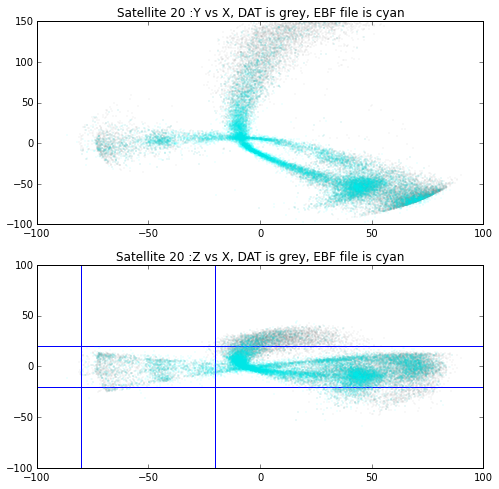

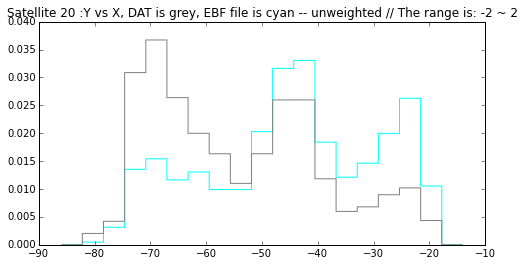

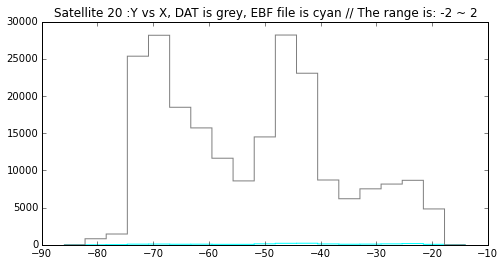

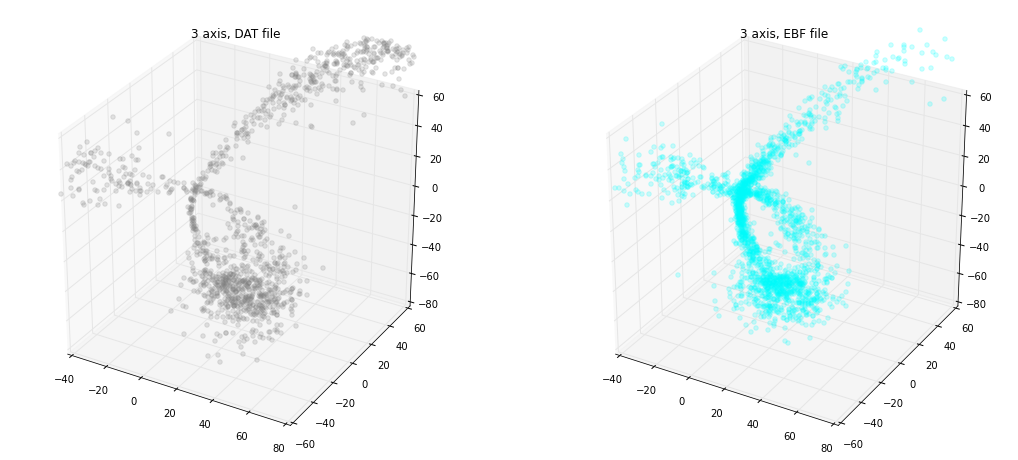

In [184]:
'''Plot me Satellite 20 in 2d, and 3d -- Thin Stream galaxy'''

ylow = 20
yupp = 40

xlow = -80
xupp = -20 

zlow= -20
zupp= 20

plt.rcParams['figure.figsize']=(8,8)
plt.xlim(-180,-160)
plt.ylim(-20,-5)

length = len(sat_20_dat)

print len(x20)

plt.subplot(2,1,1)
plt.plot(x20,y20,'.',ms=3,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')
#plt.axhline(y=ylow)
#plt.axhline(y=yupp)
#plt.axvline(x=xlow)
#plt.axvline(x=xupp)

plt.xlim(-100,100)
plt.ylim(-100,150)

plt.subplot(2,1,2)
plt.plot(x20,z20,'.',ms=3,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')
plt.axhline(y=zlow)
plt.axhline(y=zupp)
plt.axvline(x=xlow)
plt.axvline(x=xupp)

plt.xlim(-100,100)
plt.ylim(-100,100)

plt.subplot(2,1,1)
pl.plot(x_al_20,y_al_20,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 20 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_20,z_al_20,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 20 :Z vs X, DAT is grey, EBF file is cyan')


#######################################################################################
x20_hist = []
x_al_20_hist = []
m20_hist = []
m_al_20_hist = []

#for i in range(len(x20)):
#    if y20[i] > ylow and y20[i]<yupp:
#        if x20[i] > xlow and x20[i]<xupp:
#            x20_hist.append(x20[i])
#            m20_hist.append(m20[i])
        
#for j in range(len(x_al_20)):
#    if y_al_20[j] > ylow and y_al_20[j]<yupp:
#        if x_al_20[j] > xlow and x_al_20[j]<xupp:
#            x_al_20_hist.append(x_al_20[j])
#            m_al_20_hist.append(m_al_20[j])

for i in range(len(x20)):
    if z20[i] > zlow and z20[i]<yupp:
        if x20[i] > xlow and x20[i]<xupp:
            x20_hist.append(x20[i])
            m20_hist.append(m20[i])
        
for j in range(len(x_al_20)):
    if z_al_20[j] > zlow and z_al_20[j]<yupp:
        if x_al_20[j] > xlow and x_al_20[j]<xupp:
            x_al_20_hist.append(x_al_20[j])
            m_al_20_hist.append(m_al_20[j])            
            
            
hist_low = xlow - (xupp-xlow)/10
hist_upp = xupp + (xupp-xlow)/10

bins = np.linspace(hist_low,hist_upp,20)        
plt.rcParams['figure.figsize']=(8,4)
fig=plt.figure()
plt.hist(x_al_20_hist,normed=True, bins = bins, histtype='step', color = 'cyan', alpha = 1)
plt.title('Satellite 20 :Y vs X, DAT is grey, EBF file is cyan -- unweighted // The range is: -2 ~ 2')
plt.hist(x20_hist,normed=True, bins = bins, histtype='step', color = 'grey',alpha = 1)

fig=plt.figure()
plt.hist(x_al_20_hist, bins = bins, histtype='step', color = 'cyan', alpha = 1)
plt.title('Satellite 20 :Y vs X, DAT is grey, EBF file is cyan // The range is: -2 ~ 2')
plt.hist(x20_hist, bins = bins, histtype='step', color = 'grey',alpha = 1, weights = m20_hist)
#########################################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_20_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x20[line],y20[line],z20[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_20)

for i in range(len(x_al_20)):
    if i % 10 == 0:
        ax.scatter(x_al_20[i],y_al_20[i],z_al_20[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')

21544
20456


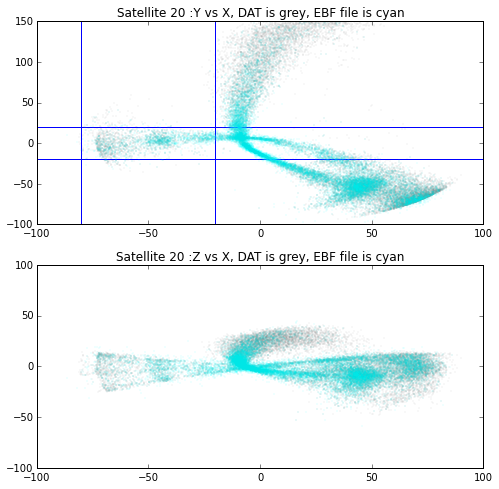

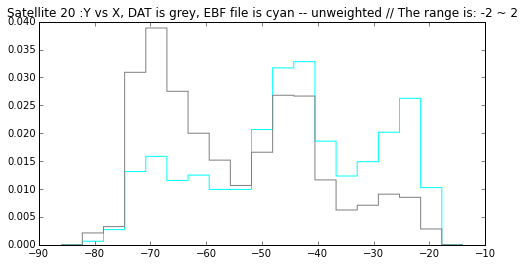

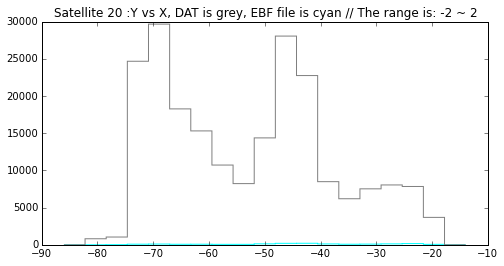

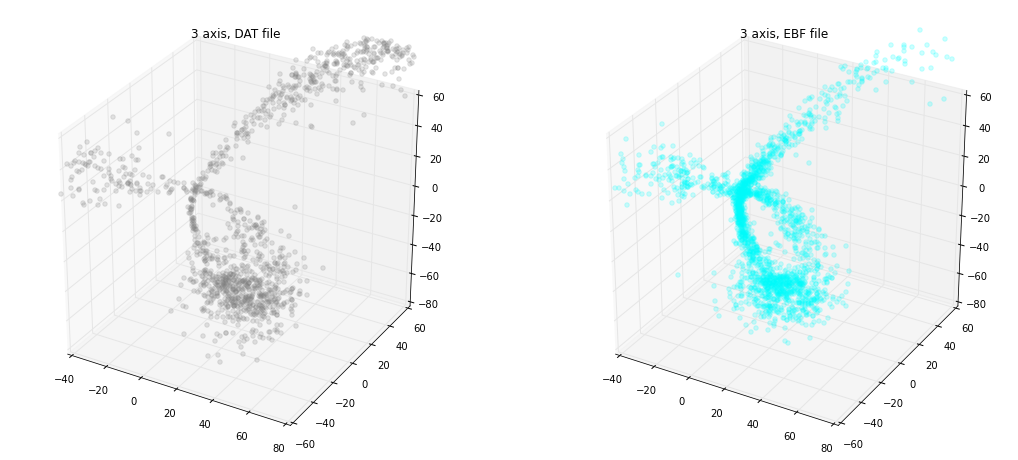

In [185]:
'''Plot me Satellite 20 in 2d, and 3d -- Thin Stream galaxy'''

ylow = -20
yupp = 20

xlow = -80
xupp = -20 

zlow= -20
zupp= 20

plt.rcParams['figure.figsize']=(8,8)
plt.xlim(-180,-160)
plt.ylim(-20,-5)

length = len(sat_20_dat)

print len(x20)

plt.subplot(2,1,1)
plt.plot(x20,y20,'.',ms=3,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')
plt.axhline(y=ylow)
plt.axhline(y=yupp)
plt.axvline(x=xlow)
plt.axvline(x=xupp)

plt.xlim(-100,100)
plt.ylim(-100,150)

plt.subplot(2,1,2)
plt.plot(x20,z20,'.',ms=3,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')
#plt.axhline(y=zlow)
#plt.axhline(y=zupp)
#plt.axvline(x=xlow)
#plt.axvline(x=xupp)

plt.xlim(-100,100)
plt.ylim(-100,100)

plt.subplot(2,1,1)
pl.plot(x_al_20,y_al_20,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 20 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_20,z_al_20,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 20 :Z vs X, DAT is grey, EBF file is cyan')


#######################################################################################
x20_hist = []
x_al_20_hist = []
m20_hist = []
m_al_20_hist = []

for i in range(len(x20)):
    if y20[i] > ylow and y20[i]<yupp:
        if x20[i] > xlow and x20[i]<xupp:
            x20_hist.append(x20[i])
            m20_hist.append(m20[i])
        
for j in range(len(x_al_20)):
    if y_al_20[j] > ylow and y_al_20[j]<yupp:
        if x_al_20[j] > xlow and x_al_20[j]<xupp:
            x_al_20_hist.append(x_al_20[j])
            m_al_20_hist.append(m_al_20[j])

#for i in range(len(x20)):
#    if z20[i] > zlow and z20[i]<yupp:
#        if x20[i] > xlow and x20[i]<xupp:
#            x20_hist.append(x20[i])
#            m20_hist.append(m20[i])
        
#for j in range(len(x_al_20)):
#    if z_al_20[j] > zlow and z_al_20[j]<yupp:
#        if x_al_20[j] > xlow and x_al_20[j]<xupp:
#            x_al_20_hist.append(x_al_20[j])
#            m_al_20_hist.append(m_al_20[j])            
            
            
hist_low = xlow - (xupp-xlow)/10
hist_upp = xupp + (xupp-xlow)/10

bins = np.linspace(hist_low,hist_upp,20)        
plt.rcParams['figure.figsize']=(8,4)
fig=plt.figure()
plt.hist(x_al_20_hist,normed=True, bins = bins, histtype='step', color = 'cyan', alpha = 1)
plt.title('Satellite 20 :Y vs X, DAT is grey, EBF file is cyan -- unweighted // The range is: -2 ~ 2')
plt.hist(x20_hist,normed=True, bins = bins, histtype='step', color = 'grey',alpha = 1)

fig=plt.figure()
plt.hist(x_al_20_hist, bins = bins, histtype='step', color = 'cyan', alpha = 1)
plt.title('Satellite 20 :Y vs X, DAT is grey, EBF file is cyan // The range is: -2 ~ 2')
plt.hist(x20_hist, bins = bins, histtype='step', color = 'grey',alpha = 1, weights = m20_hist)
#########################################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_20_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x20[line],y20[line],z20[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_20)

for i in range(len(x_al_20)):
    if i % 10 == 0:
        ax.scatter(x_al_20[i],y_al_20[i],z_al_20[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')

21544
20456


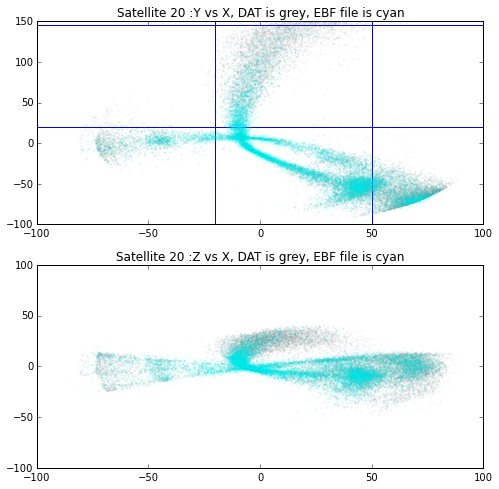

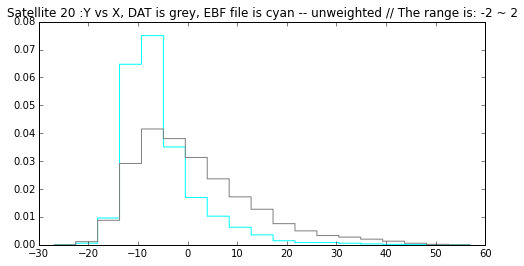

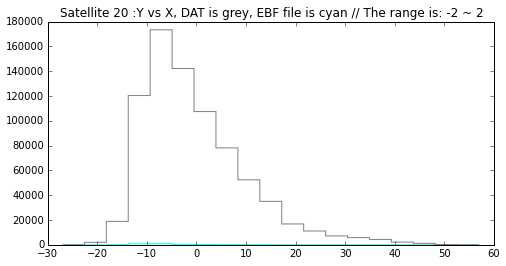

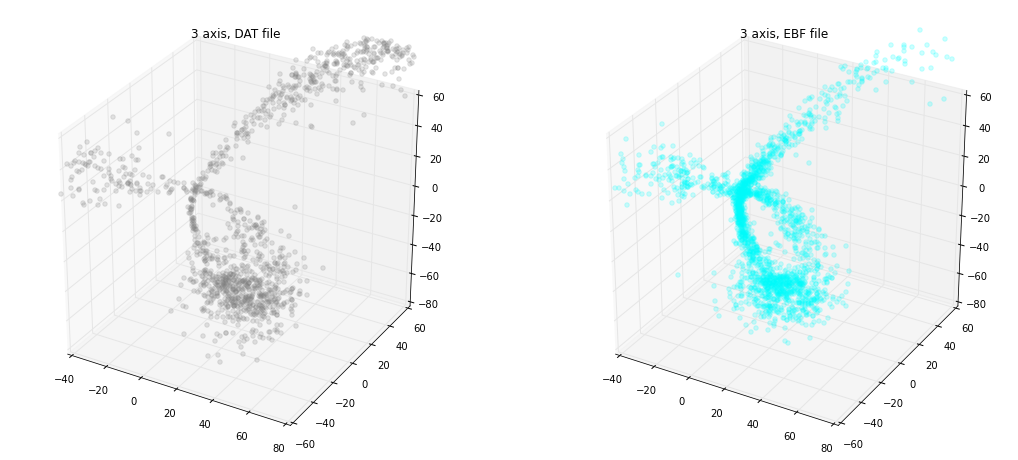

In [187]:
'''Plot me Satellite 20 in 2d, and 3d -- Thin Stream galaxy'''

ylow = 20
yupp = 145

xlow = -20
xupp = 50 

zlow= -20
zupp= 20

plt.rcParams['figure.figsize']=(8,8)
plt.xlim(-180,-160)
plt.ylim(-20,-5)

length = len(sat_20_dat)

print len(x20)

plt.subplot(2,1,1)
plt.plot(x20,y20,'.',ms=3,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')
plt.axhline(y=ylow)
plt.axhline(y=yupp)
plt.axvline(x=xlow)
plt.axvline(x=xupp)

plt.xlim(-100,100)
plt.ylim(-100,150)

plt.subplot(2,1,2)
plt.plot(x20,z20,'.',ms=3,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')
#plt.axhline(y=zlow)
#plt.axhline(y=zupp)
#plt.axvline(x=xlow)
#plt.axvline(x=xupp)

plt.xlim(-100,100)
plt.ylim(-100,100)

plt.subplot(2,1,1)
pl.plot(x_al_20,y_al_20,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 20 :Y vs X, DAT is grey, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_20,z_al_20,'.',ms=2,alpha=0.1,color='cyan')
plt.title('Satellite 20 :Z vs X, DAT is grey, EBF file is cyan')


#######################################################################################
x20_hist = []
x_al_20_hist = []
m20_hist = []
m_al_20_hist = []

for i in range(len(x20)):
    if y20[i] > ylow and y20[i]<yupp:
        if x20[i] > xlow and x20[i]<xupp:
            x20_hist.append(x20[i])
            m20_hist.append(m20[i])
        
for j in range(len(x_al_20)):
    if y_al_20[j] > ylow and y_al_20[j]<yupp:
        if x_al_20[j] > xlow and x_al_20[j]<xupp:
            x_al_20_hist.append(x_al_20[j])
            m_al_20_hist.append(m_al_20[j])

#for i in range(len(x20)):
#    if z20[i] > zlow and z20[i]<yupp:
#        if x20[i] > xlow and x20[i]<xupp:
#            x20_hist.append(x20[i])
#            m20_hist.append(m20[i])
        
#for j in range(len(x_al_20)):
#    if z_al_20[j] > zlow and z_al_20[j]<yupp:
#        if x_al_20[j] > xlow and x_al_20[j]<xupp:
#            x_al_20_hist.append(x_al_20[j])
#            m_al_20_hist.append(m_al_20[j])            
            
            
hist_low = xlow - (xupp-xlow)/10
hist_upp = xupp + (xupp-xlow)/10

bins = np.linspace(hist_low,hist_upp,20)        
plt.rcParams['figure.figsize']=(8,4)
fig=plt.figure()
plt.hist(x_al_20_hist,normed=True, bins = bins, histtype='step', color = 'cyan', alpha = 1)
plt.title('Satellite 20 :Y vs X, DAT is grey, EBF file is cyan -- unweighted // The range is: -2 ~ 2')
plt.hist(x20_hist,normed=True, bins = bins, histtype='step', color = 'grey',alpha = 1)

fig=plt.figure()
plt.hist(x_al_20_hist, bins = bins, histtype='step', color = 'cyan', alpha = 1)
plt.title('Satellite 20 :Y vs X, DAT is grey, EBF file is cyan // The range is: -2 ~ 2')
plt.hist(x20_hist, bins = bins, histtype='step', color = 'grey',alpha = 1, weights = m20_hist)
#########################################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_20_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x20[line],y20[line],z20[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        

ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_20)

for i in range(len(x_al_20)):
    if i % 10 == 0:
        ax.scatter(x_al_20[i],y_al_20[i],z_al_20[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')

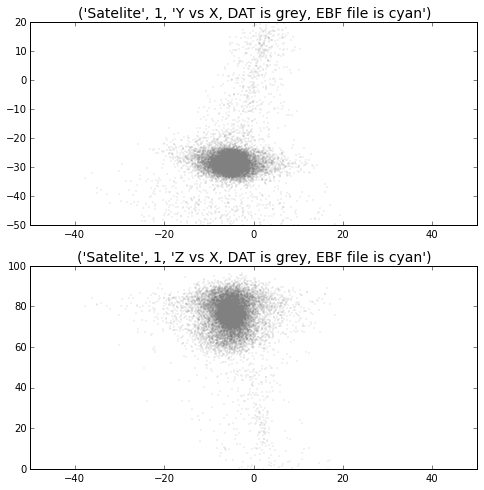

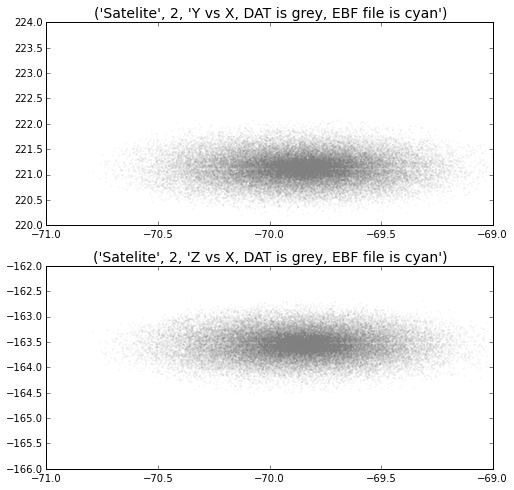

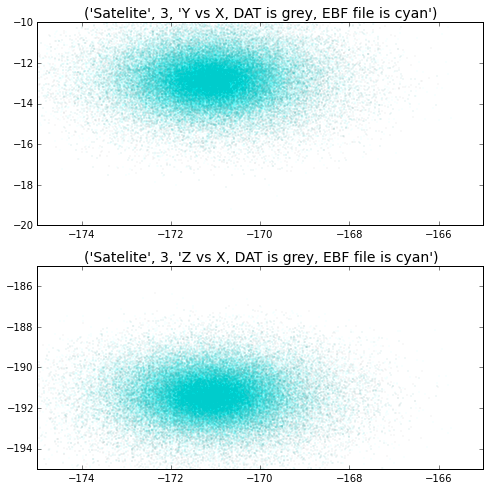

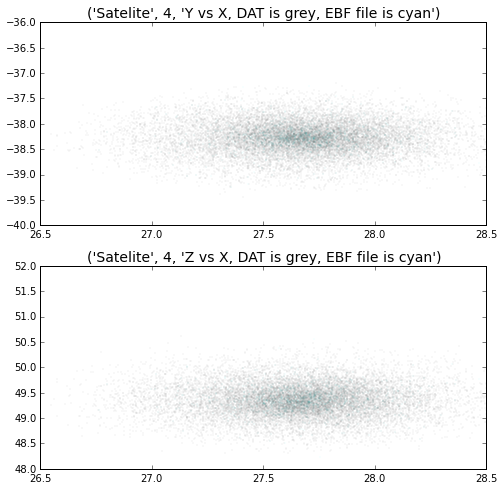

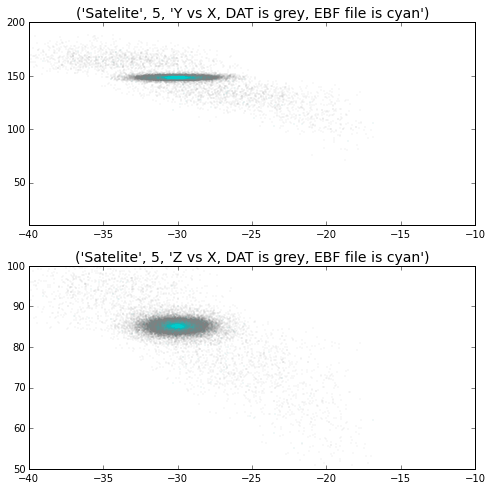

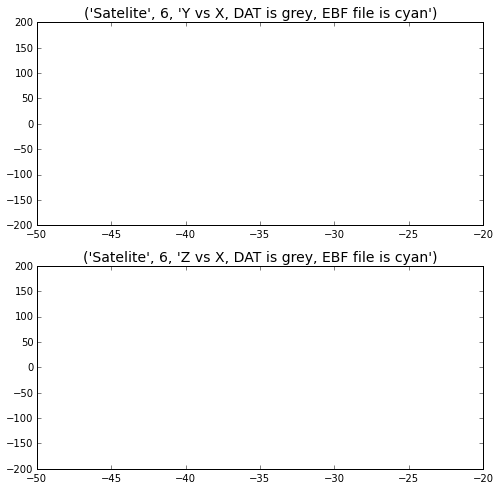

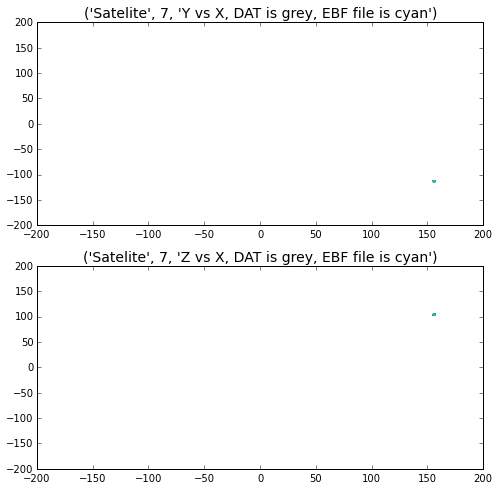

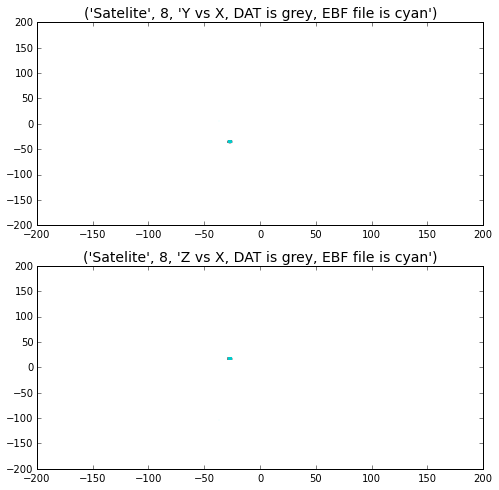

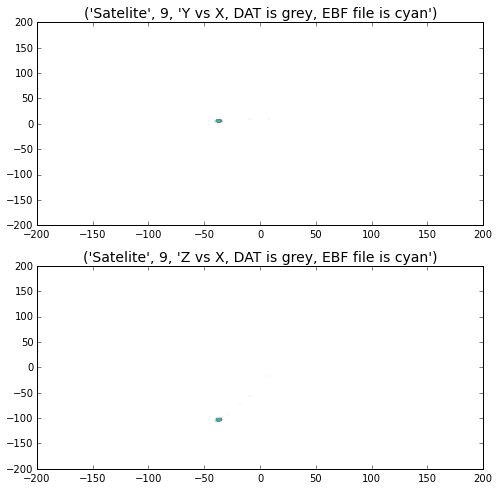

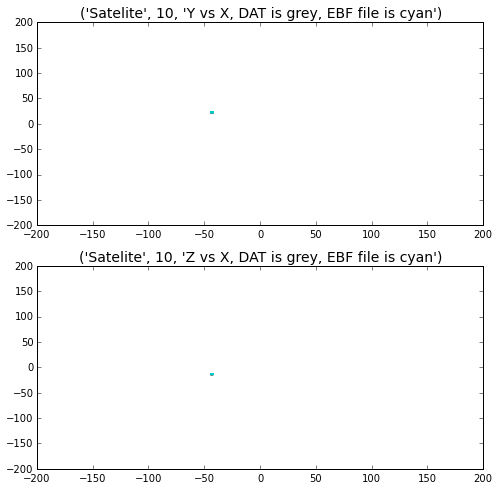

In [480]:
'''Plot me ALL Satellite 2d '''

def plot_me(p,xstart,xend,ystart,yend,zstart,zend):
 

    plt.rcParams['figure.figsize']=(8,8)


    plt.subplot(2,1,1)
    plt.plot(info_DAT[p][1],info_DAT[p][2],'.',ms=3,alpha=0.05,color='grey')
   
    plt.xlim(xstart,xend)
    plt.ylim(ystart,yend)

    plt.subplot(2,1,2)
    plt.plot(info_DAT[p][1],info_DAT[p][3],'.',ms=3,alpha=0.05,color='grey')

    plt.xlim(xstart,xend)
    plt.ylim(zstart,zend)

    plt.subplot(2,1,1)
    pl.plot(info_EBF[p][1],info_EBF[p][2],'.',ms=2,alpha=0.05,color='cyan')
    title = 'Satelite',p,'Y vs X, DAT is grey, EBF file is cyan'
    plt.title(title,fontsize=14)

    plt.subplot(2,1,2)
    plt.plot(info_EBF[p][1],info_EBF[p][3],'.',ms=2,alpha=0.05,color='cyan')
    title ='Satelite',p,'Z vs X, DAT is grey, EBF file is cyan'
    plt.title(title,fontsize=14)
 
#####################################################################
p=1
[xstart,xend,ystart,yend,zstart,zend]=[-50,50,-50,20,0,100]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=2
[xstart,xend,ystart,yend,zstart,zend]=[-71,-69,220,224,-166,-162]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=3
[xstart,xend,ystart,yend,zstart,zend]=[-175,-165,-20,-10,-195,-185]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=4
[xstart,xend,ystart,yend,zstart,zend]=[26.5,28.5,-40,-36,48,52]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=5
[xstart,xend,ystart,yend,zstart,zend]=[-40,-10,10,200,50,100]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=6
[xstart,xend,ystart,yend,zstart,zend]=[-50,-20,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=7
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=8
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=9
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=10
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()

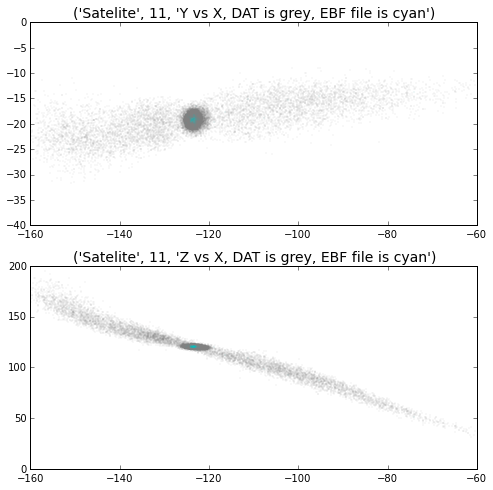

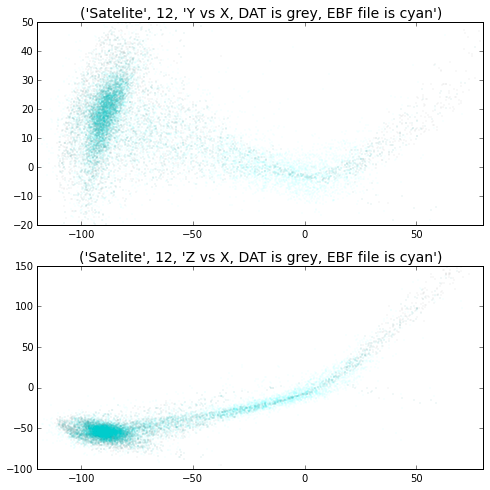

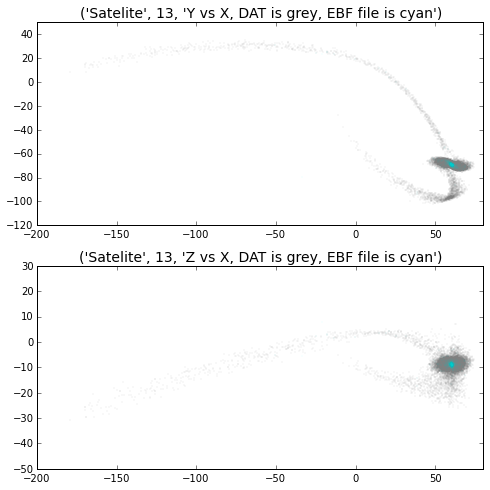

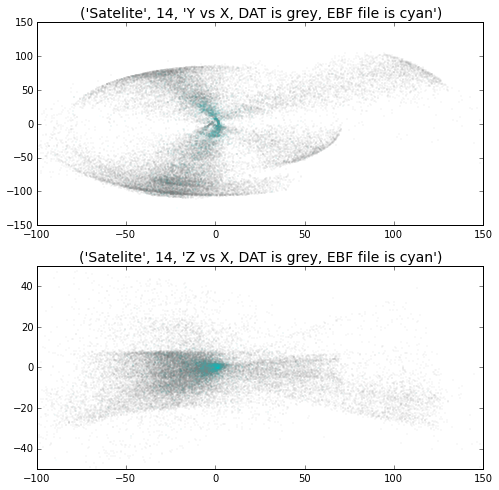

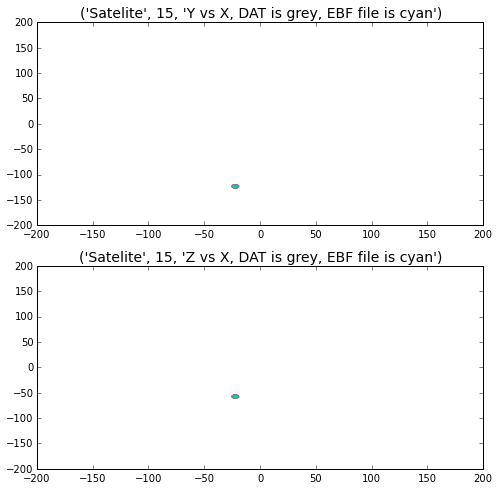

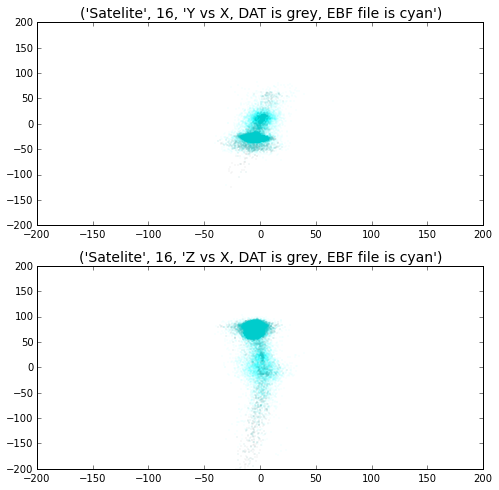

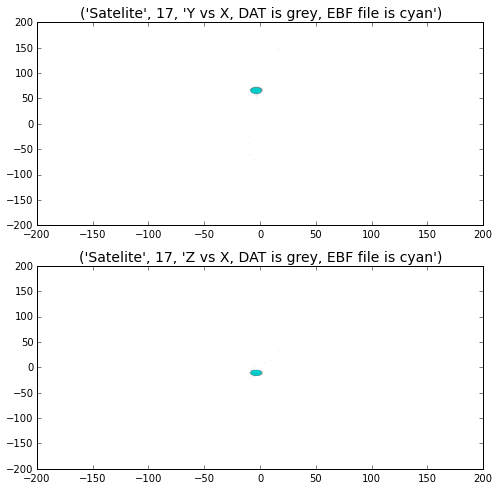

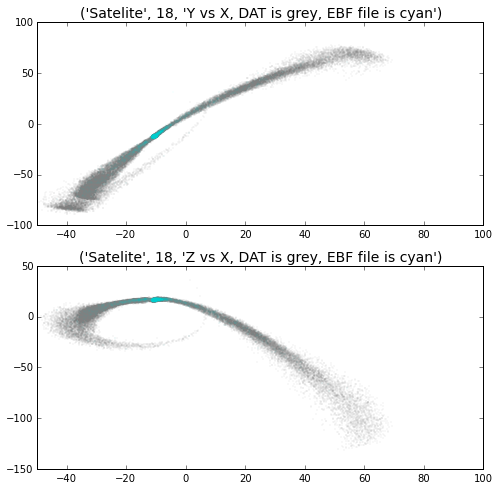

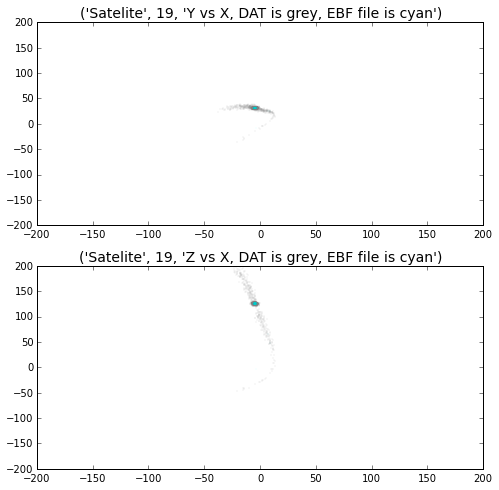

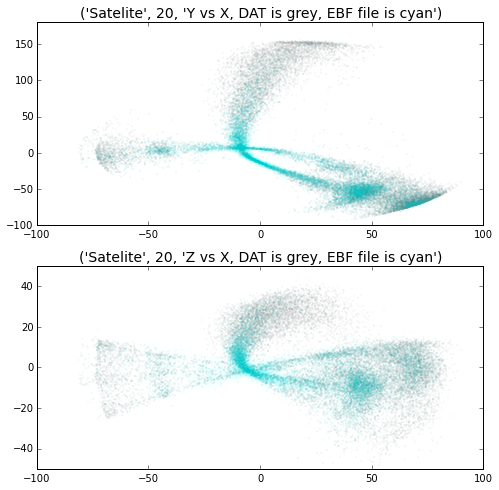

In [481]:
p=11
[xstart,xend,ystart,yend,zstart,zend]=[-160,-60,-40,0,0,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=12
[xstart,xend,ystart,yend,zstart,zend]=[-120,80,-20,50,-100,150]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=13
[xstart,xend,ystart,yend,zstart,zend]=[-200,80,-120,50,-50,30]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=14
[xstart,xend,ystart,yend,zstart,zend]=[-100,150,-150,150,-50,50]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=15
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=16
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=17
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=18
[xstart,xend,ystart,yend,zstart,zend]=[-50,100,-100,100,-150,50]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=19
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=20
[xstart,xend,ystart,yend,zstart,zend]=[-100,100,-100,180,-50,50]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()


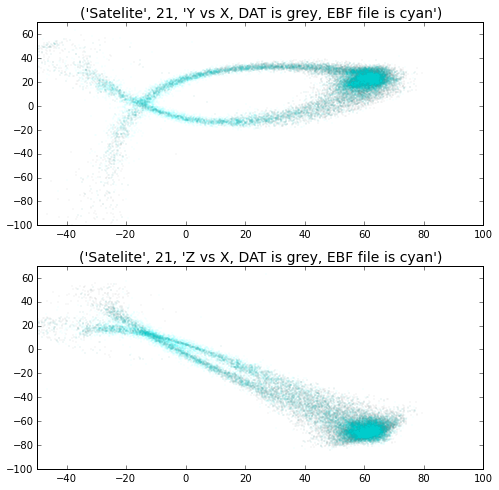

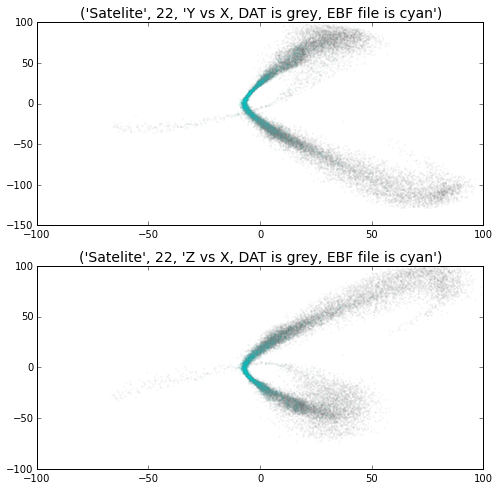

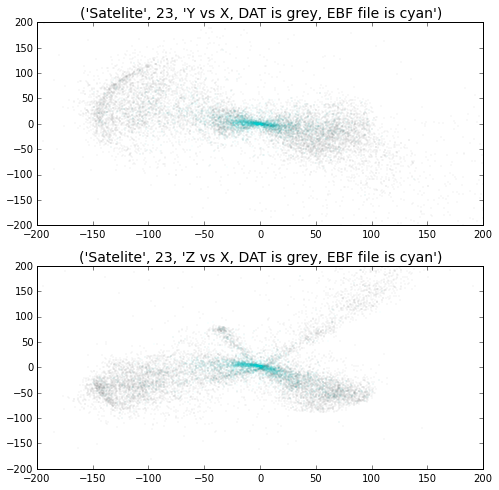

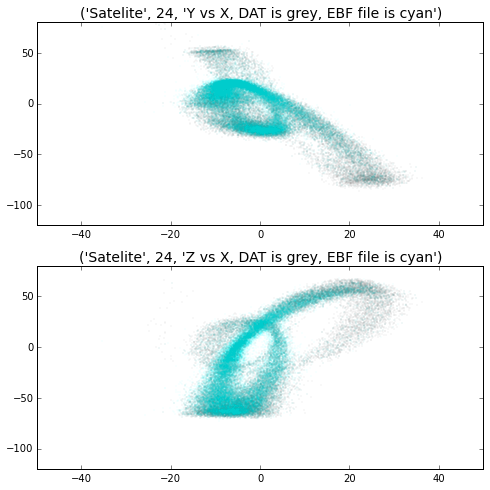

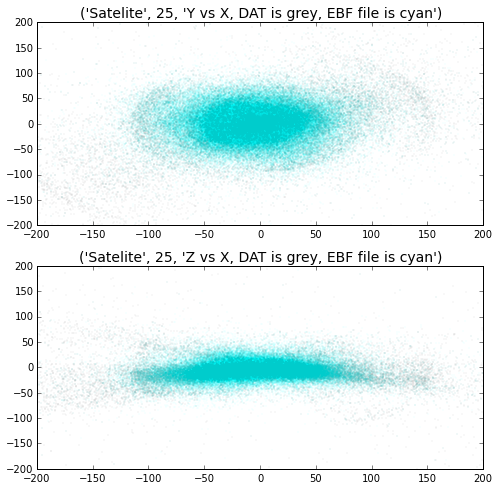

In [486]:
p=21
[xstart,xend,ystart,yend,zstart,zend]=[-50,100,-100,70,-100,70]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=22
[xstart,xend,ystart,yend,zstart,zend]=[-100,100,-150,100,-100,100]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=23
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=24
[xstart,xend,ystart,yend,zstart,zend]=[-50,50,-120,80,-120,80]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()
p=25
[xstart,xend,ystart,yend,zstart,zend]=[-200,200,-200,200,-200,200]
plot_me(p,xstart,xend,ystart,yend,zstart,zend)
plt.figure()